In [1]:
import polars as pl
import pandas as pd
import prince
import numpy as np
print(pl.__version__)

1.31.0


In [2]:
import preprocessing_data as ppd

In [3]:
df=ppd.make_clean("data/dataset-tickets-multi-lang3-4k.csv")
df

Some elements have been dropped during cleaning


shape: (3_999, 16)
┌────────────────┬────────────────┬────────────────┬──────────┬───┬────────────────┬───────────┬───────────────┬───────┐
│ subject        ┆ body           ┆ answer         ┆ type     ┆ … ┆ tag_5          ┆ tag_6     ┆ tag_7         ┆ tag_8 │
│ ---            ┆ ---            ┆ ---            ┆ ---      ┆   ┆ ---            ┆ ---       ┆ ---           ┆ ---   │
│ str            ┆ str            ┆ str            ┆ str      ┆   ┆ str            ┆ str       ┆ str           ┆ str   │
╞════════════════╪════════════════╪════════════════╪══════════╪═══╪════════════════╪═══════════╪═══════════════╪═══════╡
│ Problema       ┆ Es necesaria   ┆ Estamos        ┆ Incident ┆ … ┆ System         ┆ null      ┆ null          ┆ null  │
│ crítico del    ┆ una            ┆ investigando   ┆          ┆   ┆ Maintenance    ┆           ┆               ┆       │
│ servidor …     ┆ investigación… ┆ urgenteme…     ┆          ┆   ┆                ┆           ┆               ┆       │
│ Anfrage zur    ┆ Sehr geehrter  ┆ Sehr geehrter  ┆ Request  ┆ … ┆ Returns and    ┆ null      ┆ null          ┆ null  │
│ Verfügbarkeit  ┆ Kundenservice, ┆ <name>,
       ┆          ┆   ┆ Exchanges      ┆           ┆               ┆       │
│ des …          ┆ 
              ┆ 
              ┆          ┆   ┆                ┆           ┆               ┆       │
│                ┆ …              ┆ viele…         ┆          ┆   ┆                ┆           ┆               ┆       │
│ Erro na Autoco ┆ Prezado        ┆ Prezado        ┆ Incident ┆ … ┆ IT Support     ┆ null      ┆ null          ┆ null  │
│ mpletação de   ┆ Suporte ao     ┆ <name>,
       ┆          ┆   ┆                ┆           ┆               ┆       │
│ Cód…           ┆ Cliente <na…   ┆ 
              ┆          ┆   ┆                ┆           ┆               ┆       │
│                ┆                ┆ Obrigado po…   ┆          ┆   ┆                ┆           ┆               ┆       │
│ Urgent         ┆ Dear IT        ┆ Dear <name>,
  ┆ Request  ┆ … ┆ Problem        ┆ Technical ┆ Performance   ┆ null  │
│ Assistance     ┆ Services       ┆ 
              ┆          ┆   ┆ Resolution     ┆ Guidance  ┆ Tuning        ┆       │
│ Required: AW…  ┆ Support Team,… ┆ Thank you for  ┆          ┆   ┆                ┆           ┆               ┆       │
│                ┆                ┆ …              ┆          ┆   ┆                ┆           ┆               ┆       │
│ Problème       ┆ Cher équipe de ┆ Cher <name>,
  ┆ Incident ┆ … ┆ Routine        ┆ null      ┆ null          ┆ null  │
│ d'affichage de ┆ support du     ┆ 
              ┆          ┆   ┆ Request        ┆           ┆               ┆       │
│ MacBoo…        ┆ maga…          ┆ Merci de nous  ┆          ┆   ┆                ┆           ┆               ┆       │
│                ┆                ┆ …              ┆          ┆   ┆                ┆           ┆               ┆       │
│ …              ┆ …              ┆ …              ┆ …        ┆ … ┆ …              ┆ …         ┆ …             ┆ …     │
│ Problem mit    ┆ Sehr geehrter  ┆ Sehr geehrter  ┆ Problem  ┆ … ┆ Problem        ┆ null      ┆ null          ┆ null  │
│ der HP DeskJet ┆ Tech Online    ┆ <name>, bitte  ┆          ┆   ┆ Resolution     ┆           ┆               ┆       │
│ 375…           ┆ Stor…          ┆ st…            ┆          ┆   ┆                ┆           ┆               ┆       │
│ Problemas com  ┆ Olá Suporte ao ┆ Assunto: Re:   ┆ Incident ┆ … ┆ Problem        ┆ Customer  ┆ null          ┆ null  │
│ a impressora   ┆ Cliente,
      ┆ Problemas com  ┆          ┆   ┆ Resolution     ┆ Service   ┆               ┆       │
│ HP …           ┆ 
              ┆ a i…           ┆          ┆   ┆                ┆           ┆               ┆       │
│                ┆ Est…           ┆                ┆          ┆   ┆                ┆           ┆               ┆       │
│ Problema       ┆ Estimado       ┆ Estimado       ┆ Incident ┆ … ┆ Problem        ┆ null      ┆ null        

In [4]:
df=pd.DataFrame(df, columns=df.columns)

In [11]:
df["queue"].value_counts()*100/sum(df["queue"].value_counts())

queue
Technical Support                  32.933233
Product Support                    17.229307
Customer Service                   15.678920
IT Support                         11.127782
Billing and Payments                8.452113
Returns and Exchanges               4.926232
Service Outages and Maintenance     3.525881
Sales and Pre-Sales                 3.425856
General Inquiry                     1.375344
Human Resources                     1.325331
Name: count, dtype: float64

# Let's go pour l'AFCM

 ## Les Tags

Après avoir analysé le tableau statistique des données produit via streamlit, il faut noter qu'il y a dans des variables "tags" qui contiennent pratiquement que des valeurs "null".  Certaines seront supprimées (tag8 et tag9) et d'autres retirées pour être utilisées comme variables supplémentaires (tag6 et 7).

In [4]:
df.columns

['subject',
 'body',
 'answer',
 'type',
 'queue',
 'priority',
 'language',
 'business_type',
 'tag_1',
 'tag_2',
 'tag_3',
 'tag_4',
 'tag_5',
 'tag_6',
 'tag_7',
 'tag_8',
 'tag_9']

In [150]:
#supprimer de la colonne tag8
df=df.drop('tag_8')
df.columns

['subject',
 'body',
 'answer',
 'type',
 'queue',
 'priority',
 'language',
 'business_type',
 'tag_1',
 'tag_2',
 'tag_3',
 'tag_4',
 'tag_5',
 'tag_6',
 'tag_7']

In [20]:
df.shape

(4000, 15)

In [29]:
df[:,8:13].columns

['tag_1', 'tag_2', 'tag_3', 'tag_4', 'tag_5']

In [117]:
df_tags=pd.DataFrame(df[:,8:13])

In [118]:
tdc = pd.get_dummies(df_tags)

In [119]:
tdc=tdc.astype(int)
tdc

0_Account Assistance  0_Account Security  0_Billing Issue  \
0                        0                   0                0   
1                        0                   0                0   
2                        0                   0                0   
3                        0                   0                0   
4                        0                   0                0   
...                    ...                 ...              ...   
3995                     0                   0                0   
3996                     0                   0                0   
3997                     0                   0                0   
3998                     0                   0                0   
3999                     0                   0                1   

      0_Consulting Services  0_Critical Failure  0_Customer Feedback  \
0                         0                   0                    0   
1                         0                   0                    0   
2                         0                   0                    0   
3                         0                   0                    0   
4                         0                   0                    0   
...                     ...                 ...                  ...   
3995                      0                   0                    0   
3996                      0                   0                    0   
3997                      0                   0                    0   
3998                      0                   0                    0   
3999                      0                   0                    0   

      0_Customer Service  0_Data Breach  0_Database Issue  0_Delivery Issue  \
0                      0              0                 0                 0   
1                      0              0                 0                 0   
2                      0              0                 0                 0   
3                      0              0                 0                 0   
4                      0              0                 0                 0   
...                  ...            ...               ...               ...   
3995                   0              0                 0                 0   
3996                   0              0                 0                 0   
3997                   0              0                 0                 0   
3998                   0              0                 0                 0   
3999                   0              0                 0                 0   

      ...  4_Urgent Issue  4_User Guidance  4_User Setup  \
0     ...               0                0             0   
1     ...               0                0             0   
2     ...               0                0             0   
3     ...               0                0             0   
4     ...               0                0             0   
...   ...             ...              ...           ...   
3995  ...               0                0             0   
3996  ...               0                0             0   
3997  ...               0                0             0   
3998  ...               0                0             0   
3999  ...               0                0             0   

      4_Video Conferencing  4_Virus Removal  4_Warranty Claim  \
0                        0                0                 0   
1                        0                0                 0   
2                        0                0                 0   
3                        0                0                 0   
4                        0                0                 0   
...                    ...              ...               ...   
3995                     0                0                 0   
3996                     0                0                 0   
3997                     0                0                 0   
3998            

In [120]:
def treat_tdc(tdc):
    '''this function is to process TDC'''
    variables=[col[2:] for col in tdc.columns]
    tags=list(set(variables))
    tdc_new = pd.DataFrame(np.zeros( (tdc.shape[0], len(tags) )), columns=sorted(tags) )
    
    #dico={tag : [] for tag in tags }
    for col in tdc.columns:
        for t in tdc_new.columns:
            if col[2:] == t:
                #dico[f"{t}"].append(col)
                tdc_new[f"{t}"] = tdc_new[f"{t}"] + tdc[f"{col}"]
                break
    
    return tdc_new


In [121]:
tdc_new=treat_tdc(tdc)
tdc_new

AWS Assistance  AWS Management  AWS Management Service  \
0                0.0             0.0                     0.0   
1                0.0             0.0                     0.0   
2                0.0             0.0                     0.0   
3                0.0             0.0                     0.0   
4                0.0             0.0                     0.0   
...              ...             ...                     ...   
3995             0.0             0.0                     0.0   
3996             0.0             0.0                     0.0   
3997             0.0             0.0                     0.0   
3998             0.0             0.0                     0.0   
3999             0.0             0.0                     0.0   

      AWS Optimization  AWS Support  Account Assistance  Account Security  \
0                  0.0          0.0                 0.0               0.0   
1                  0.0          0.0                 0.0               0.0   
2                  0.0          0.0                 0.0               0.0   
3                  0.0          0.0                 0.0               0.0   
4                  0.0          0.0                 0.0               0.0   
...                ...          ...                 ...               ...   
3995               0.0          0.0                 0.0               0.0   
3996               0.0          0.0                 0.0               0.0   
3997               0.0          0.0                 0.0               0.0   
3998               0.0          0.0                 0.0               0.0   
3999               0.0          0.0                 1.0               0.0   

      Accounting Assistance  Amazon Web Services  Audio Issue  ...  \
0                       0.0                  0.0          0.0  ...   
1                       0.0                  0.0          0.0  ...   
2                       0.0                  0.0          0.0  ...   
3                       0.0                  0.0          0.0  ...   
4                       0.0                  0.0          0.0  ...   
...                     ...                  ...          ...  ...   
3995                    0.0                  0.0          0.0  ...   
3996                    0.0                  0.0          0.0  ...   
3997                    0.0                  0.0          0.0  ...   
3998                    0.0                  0.0          0.0  ...   
3999                    0.0                  0.0          0.0  ...   

      Wi-Fi Configuration  Wi-Fi Connection  Wi-Fi Connectivity  \
0                     0.0               0.0                 0.0   
1                     0.0               0.0                 0.0   
2                     0.0               0.0                 0.0   
3                     0.0               0.0                 0.0   
4                     0.0               0.0                 0.0   
...                   ...               ...                 ...   
3995                  0.0               0.0                 0.0   
3996                  0.0               0.0                 0.0   
3997                  0.0               0.0                 0.0   
3998                  0.0               0.0                 0.0   
3999                  0.0               0.0                 0.0   

      Wi-Fi Connectivity Issue  Wi-Fi Issue  Wi-Fi Issues  Wi-Fi Setup  \
0                          0.0          0.0           0.0          0.0   
1                          0.0          0.0           0.0          0.0   
2                          0.0          0.0           0.0          0.0   
3                          0.0          0.0           0.0          0.0   
4                          0.0          0.0           0.0          0.0   
...                        ...          ...           ...          ...   
3995                       0.0          0.0           0.0          0.0   
3996                       0.0          0.0           0.0          0.0   


In [122]:
tdc_new.sum().sort_values(ascending=False)

Technical Support           3115.0
Problem Resolution          2281.0
Product Support             1788.0
Urgent Issue                1571.0
IT Support                   949.0
                             ...  
Video Conferencing Issue       1.0
Wi-Fi Issues                   1.0
Wi-Fi Connectivity             1.0
Wireless Configuration         1.0
Wi-Fi Setup                    1.0
Length: 161, dtype: float64

In [123]:
# Initialisation et entraînement ACM
mca = prince.MCA(n_components=5, random_state=15)
mca = mca.fit(tdc_new)

# Coordonnées des individus
coord_individus = mca.row_coordinates(tdc_new)

# Coordonnées des modalités
coord_modalites = mca.column_coordinates(tdc_new)


In [125]:
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.024         2.37%                      2.37%
1              0.017         1.72%                      4.09%
2              0.014         1.40%                      5.49%
3              0.013         1.33%                      6.82%
4              0.012         1.25%                      8.07%

* Au vue de ces résultats, nous ne pouvons tirer grand chose compte tenu du la faible contribution de chaque axe (moins de 3%).
Passons à une analyse avec les autres variables (type, queue, priority, business_type).

## Les autres variables

In [126]:
df.columns

['subject',
 'body',
 'answer',
 'type',
 'queue',
 'priority',
 'language',
 'business_type',
 'tag_1',
 'tag_2',
 'tag_3',
 'tag_4',
 'tag_5',
 'tag_6',
 'tag_7']

In [161]:
df_other_var = pd.DataFrame(df[['type','queue','priority','business_type']], columns=['type','queue','priority','business_type'])
df_other_var

type                            queue priority      business_type
0     Incident                Technical Support     high        IT Services
1      Request                 Customer Service      low  Tech Online Store
2     Incident                Technical Support     high        IT Services
3      Request                       IT Support     high        IT Services
4     Incident                  Product Support      low  Tech Online Store
...        ...                              ...      ...                ...
3995   Problem                 Customer Service      low  Tech Online Store
3996  Incident                  Product Support   medium  Tech Online Store
3997  Incident  Service Outages and Maintenance     high       Online Store
3998  Incident                Technical Support     high        IT Services
3999   Problem             Billing and Payments     high  Tech Online Store

[4000 rows x 4 columns]

In [162]:
tdc = pd.get_dummies(df_other_var)


type_Change  type_Incident  type_Problem  type_Request  \
0               0              1             0             0   
1               0              0             0             1   
2               0              1             0             0   
3               0              0             0             1   
4               0              1             0             0   
...           ...            ...           ...           ...   
3995            0              0             1             0   
3996            0              1             0             0   
3997            0              1             0             0   
3998            0              1             0             0   
3999            0              0             1             0   

      queue_Billing and Payments  queue_Customer Service  \
0                              0                       0   
1                              0                       1   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
3995                           0                       1   
3996                           0                       0   
3997                           0                       0   
3998                           0                       0   
3999                           1                       0   

      queue_General Inquiry  queue_Human Resources  queue_IT Support  \
0                         0                      0                 0   
1                         0                      0                 0   
2                         0                      0                 0   
3                         0                      0                 1   
4                         0                      0                 0   
...                     ...                    ...               ...   
3995                      0                      0                 0   
3996                      0                      0                 0   
3997                      0                      0                 0   
3998                      0                      0                 0   
3999                      0                      0                 0   

      queue_Product Support  ...  priority_medium  \
0                         0  ...                0   
1                         0  ...                0   
2                         0  ...                0   
3                         0  ...                0   
4                         1  ...                0   
...                     ...  ...              ...   
3995                      0  ...                0   
3996                      1  ...                1   
3997                      0  ...                0   
3998                      0  ...                0   
3999                      0  ...                0   

      business_type_Adobe Photoshop 2024  business_type_IT Consulting Firm  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   
4                                      0                                 0   
...                                  ...                               ...   
3995                                   0                                 0   
3996                                   0                                 0   
3997                                   0                                 0   
3998                                   0                                 0   
3999                                   0                                 0   

      business_type_IT Consulting Service  business_type_IT Services  \
0    

In [174]:
tdc_new = tdc.astype(int)
tdc_new

type_Change  type_Incident  type_Problem  type_Request  \
0               0              1             0             0   
1               0              0             0             1   
2               0              1             0             0   
3               0              0             0             1   
4               0              1             0             0   
...           ...            ...           ...           ...   
3995            0              0             1             0   
3996            0              1             0             0   
3997            0              1             0             0   
3998            0              1             0             0   
3999            0              0             1             0   

      queue_Billing and Payments  queue_Customer Service  \
0                              0                       0   
1                              0                       1   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
3995                           0                       1   
3996                           0                       0   
3997                           0                       0   
3998                           0                       0   
3999                           1                       0   

      queue_General Inquiry  queue_Human Resources  queue_IT Support  \
0                         0                      0                 0   
1                         0                      0                 0   
2                         0                      0                 0   
3                         0                      0                 1   
4                         0                      0                 0   
...                     ...                    ...               ...   
3995                      0                      0                 0   
3996                      0                      0                 0   
3997                      0                      0                 0   
3998                      0                      0                 0   
3999                      0                      0                 0   

      queue_Product Support  ...  priority_medium  \
0                         0  ...                0   
1                         0  ...                0   
2                         0  ...                0   
3                         0  ...                0   
4                         1  ...                0   
...                     ...  ...              ...   
3995                      0  ...                0   
3996                      1  ...                1   
3997                      0  ...                0   
3998                      0  ...                0   
3999                      0  ...                0   

      business_type_Adobe Photoshop 2024  business_type_IT Consulting Firm  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   
4                                      0                                 0   
...                                  ...                               ...   
3995                                   0                                 0   
3996                                   0                                 0   
3997                                   0                                 0   
3998                                   0                                 0   
3999                                   0                                 0   

      business_type_IT Consulting Service  business_type_IT Services  \
0    

In [175]:
tdc_new.columns

Index(['type_Change', 'type_Incident', 'type_Problem', 'type_Request',
       'queue_Billing and Payments', 'queue_Customer Service',
       'queue_General Inquiry', 'queue_Human Resources', 'queue_IT Support',
       'queue_Product Support', 'queue_Returns and Exchanges',
       'queue_Sales and Pre-Sales', 'queue_Service Outages and Maintenance',
       'queue_Technical Support', 'priority_high', 'priority_low',
       'priority_medium', 'business_type_Adobe Photoshop 2024',
       'business_type_IT Consulting Firm',
       'business_type_IT Consulting Service', 'business_type_IT Services',
       'business_type_Online Store', 'business_type_Pit Services',
       'business_type_Software Development Company',
       'business_type_Tech Online Store', 'business_type__IT_Services_'],
      dtype='object')

In [176]:
# Initialisation et entraînement ACM
mca = prince.MCA(n_components=5, random_state=42)
mca = mca.fit(tdc_new)

# Coordonnées des individus
coord_individus = mca.row_coordinates(tdc_new)

# Coordonnées des modalités
coord_modalites = mca.column_coordinates(tdc_new)


In [177]:
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.105        10.47%                     10.47%
1              0.068         6.77%                     17.24%
2              0.061         6.07%                     23.30%
3              0.056         5.57%                     28.87%
4              0.055         5.52%                     34.39%

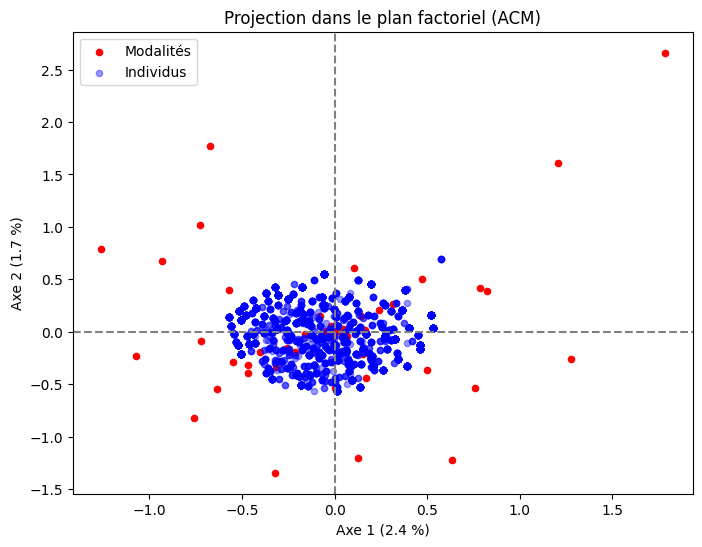

In [178]:
coord_ind = mca.row_coordinates(tdc_new)
coord_var = mca.column_coordinates(tdc_new)

# Affichage
fig, ax = plt.subplots(figsize=(8, 6))
coord_var.plot(kind='scatter', x=0, y=1, ax=ax, color='red', label='Modalités')
coord_ind.plot(kind='scatter', x=0, y=1, ax=ax, color='blue', alpha=0.4, label='Individus')

ax.axhline(0, color='grey', linestyle='--')
ax.axvline(0, color='grey', linestyle='--')
ax.set_xlabel(f'Axe 1 ({var_exp[0]:.1f} %)')
ax.set_ylabel(f'Axe 2 ({var_exp[1]:.1f} %)')
ax.set_title('Projection dans le plan factoriel (ACM)')
ax.legend()
plt.show()

In [179]:
pd.crosstab(df_other_var['queue'], df['business_type'])

col_0                            Adobe Photoshop 2024  IT Consulting Firm  \
queue                                                                       
Billing and Payments                                0                  26   
Customer Service                                    0                  92   
General Inquiry                                     0                  15   
Human Resources                                     0                  10   
IT Support                                          0                  52   
Product Support                                     2                  23   
Returns and Exchanges                               0                   0   
Sales and Pre-Sales                                 0                  20   
Service Outages and Maintenance                     0                   3   
Technical Support                                   0                 150   

col_0                            IT Consulting Service  IT Services  \
queue                                                                 
Billing and Payments                                 0          116   
Customer Service                                     3          216   
General Inquiry                                      0           28   
Human Resources                                      0           36   
IT Support                                           0          360   
Product Support                                      0           79   
Returns and Exchanges                                0            5   
Sales and Pre-Sales                                  0           11   
Service Outages and Maintenance                      0          122   
Technical Support                                    4          743   

col_0                            Online Store  Pit Services  \
queue                                                         
Billing and Payments                       12             0   
Customer Service                           27             0   
General Inquiry                             4             0   
Human Resources                             1             0   
IT Support                                 13             0   
Product Support                            30             0   
Returns and Exchanges                      14             0   
Sales and Pre-Sales                         9             0   
Service Outages and Maintenance            11             0   
Technical Support                          50             5   

col_0                            Software Development Company  \
queue                                                           
Billing and Payments                                       37   
Customer Service                                           19   
General Inquiry                                             2   
Human Resources                                             6   
IT Support                                                 10   
Product Support                                            84   
Returns and Exchanges                                       0   
Sales and Pre-Sales                                        26   
Service Outages and Maintenance                             1   
Technical Support                                         126   

col_0                            Tech Online Store  _IT_Services_  
queue                                                              
Billing and Payments                           147              0  
Customer Service                               270              0  
General Inquiry                                  6              0  
Human Resources                                  0              0  
IT Support                                      10              0  
Product Support                                472              0  
Returns and Exchanges                          178              0  
Sales and Pre-Sales                             71              0  
Serv

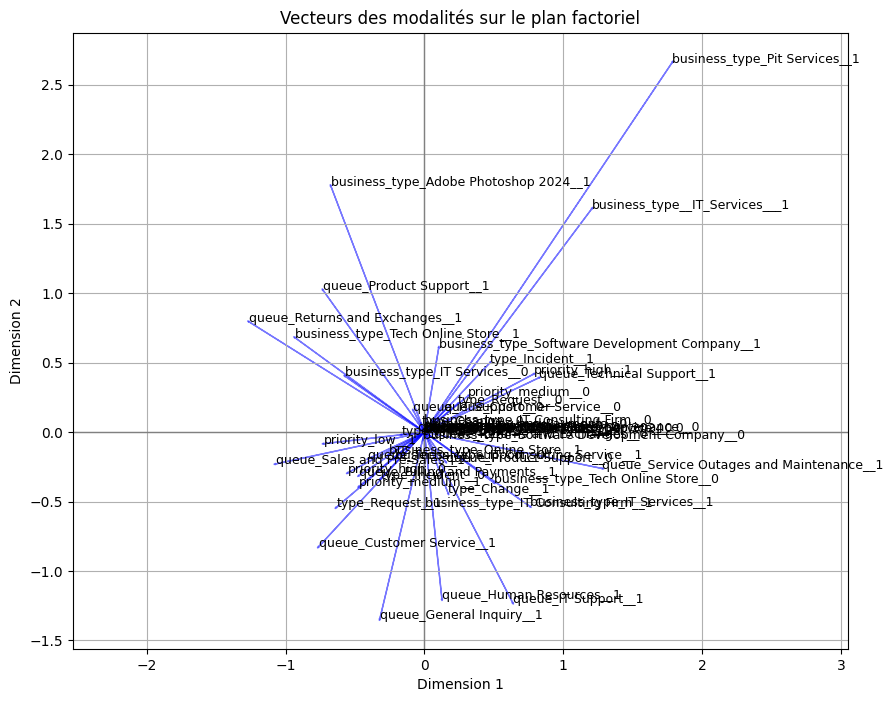

In [180]:

coord_modalites = mca.column_coordinates(tdc_new)

# Tracé
plt.figure(figsize=(10, 8))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Tracer les vecteurs
for i in range(coord_modalites.shape[0]):
    x = coord_modalites.iloc[i, 0]
    y = coord_modalites.iloc[i, 1]
    plt.arrow(0, 0, x, y, color='blue', alpha=0.5, head_width=0.01)
    plt.text(x, y, coord_modalites.index[i], fontsize=9)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Vecteurs des modalités sur le plan factoriel')
plt.grid(True)
plt.axis('equal')  # Pour garder les bonnes proportions
plt.show()


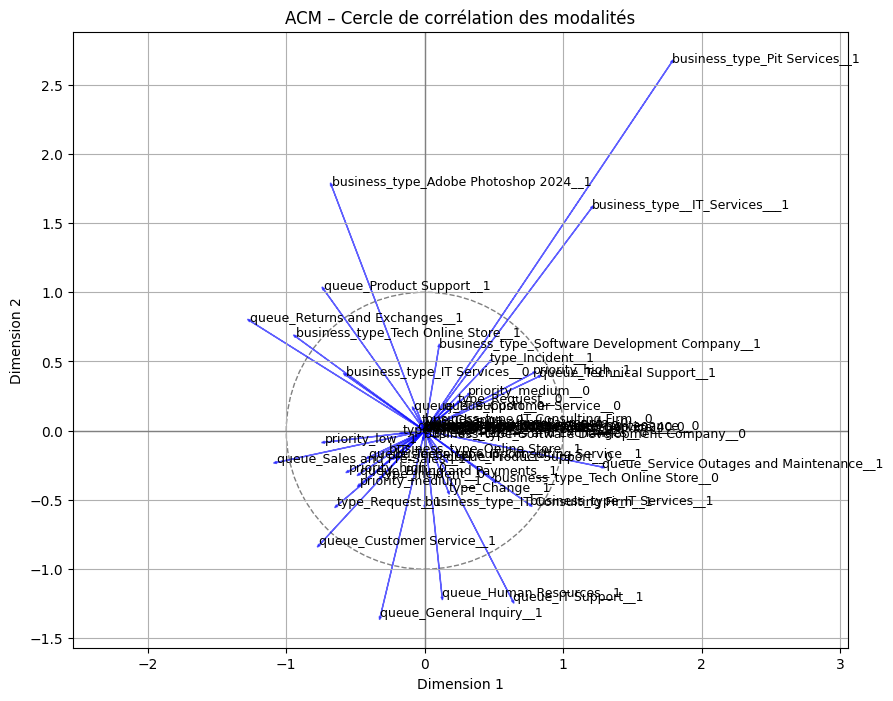

In [181]:
# Tracer les vecteurs des modalités avec cercle de corrélation
plt.figure(figsize=(10, 8))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Cercle de corrélation
circle = plt.Circle((0, 0), 1, color='grey', fill=False, linestyle='--')
plt.gca().add_patch(circle)

# Tracer les vecteurs
for i in range(coord_modalites.shape[0]):
    x = coord_modalites.iloc[i, 0]
    y = coord_modalites.iloc[i, 1]
    plt.arrow(0, 0, x, y, color='blue', alpha=0.6, head_width=0.015)
    plt.text(x, y, coord_modalites.index[i], fontsize=9)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('ACM – Cercle de corrélation des modalités')
plt.grid(True)
plt.axis('equal')  # pour que le cercle soit bien rond
plt.show()

In [182]:
mca.column_contributions_

0             1  \
type_Change__0                                 1.455589e-04  1.501923e-03   
type_Change__1                                 1.171716e-03  1.209014e-02   
type_Incident__0                               2.208598e-02  3.827555e-02   
type_Incident__1                               3.285427e-02  5.693726e-02   
type_Problem__0                                5.588068e-04  1.022443e-05   
type_Problem__1                                2.061624e-03  3.772132e-05   
type_Request__0                                1.528815e-02  1.725438e-02   
type_Request__1                                4.045716e-02  4.566040e-02   
queue_Billing and Payments__0                  6.330369e-04  4.310235e-04   
queue_Billing and Payments__1                  6.858524e-03  4.669846e-03   
queue_Customer Service__0                      6.200942e-03  1.124925e-02   
queue_Customer Service__1                      3.335849e-02  6.051632e-02   
queue_General Inquiry__0                       7.264445e-06  1.964722e-04   
queue_General Inquiry__1                       5.210588e-04  1.409241e-02   
queue_Human Resources__0                       1.029557e-06  1.455561e-04   
queue_Human Resources__1                       7.667284e-05  1.083981e-02   
queue_IT Support__0                            2.059149e-03  1.190188e-02   
queue_IT Support__1                            1.645006e-02  9.508135e-02   
queue_Product Support__0                       7.030313e-03  2.125939e-02   
queue_Product Support__1                       3.372512e-02  1.019835e-01   
queue_Returns and Exchanges__0                 1.491898e-03  9.112970e-04   
queue_Returns and Exchanges__1                 2.880045e-02  1.759220e-02   
queue_Sales and Pre-Sales__0                   5.113138e-04  3.622669e-05   
queue_Sales and Pre-Sales__1                   1.441756e-02  1.021487e-03   
queue_Service Outages and Maintenance__0       7.737726e-04  5.018335e-05   
queue_Service Outages and Maintenance__1       2.117722e-02  1.373458e-03   
queue_Technical Support__0                     4.015181e-02  1.397441e-02   
queue_Technical Support__1                     8.179751e-02  2.846876e-02   
priority_high__0                               6.541014e-02  2.855269e-02   
priority_high__1                               9.325606e-02  4.070793e-02   
priority_low__0                                8.265953e-03  1.699356e-04   
priority_low__1                                3.593700e-02  7.388111e-04   
priority_medium__0                             2.172386e-02  2.315336e-02   
priority_medium__1                             3.248414e-02  3.462172e-02   
business_type_Adobe Photoshop 2024__0          4.164181e-08  4.446837e-07   
business_type_Adobe Photoshop 2024__1          8.324199e-05  8.889228e-04   
business_type_IT Consulting Firm__0            1.176811e-08  1.741439e-03   
business_type_IT Consulting Firm__1            1.086217e-07  1.607379e-02   
business_type_IT Consulting Service__0         5.216267e-08  6.523274e-08   
business_type_IT Consulting Service__1         2.975507e-05  3.721062e-05   
business_type_IT Services__0                   6.804828e-02  5.220644e-02   
business_type_IT Services__1                   9.057242e-02  6.948689e-02   
business_type_Online Store__0                  4.564621e-05  2.704607e-05   
business_type_Online Store__1                  1.022101e-03  6.056106e-04   
business_type_Pit Services__0                  1.828553e-06  6.291106e-06   
business_type_Pit Services__1                  1.461013e-03  5.026594e-03   
business_type_Software Development Company__0  2.531982e-05  1.363922e-03   
business_type_Software Development Company__1  3.003371e-04  1.617849e-02   
business_type_Tech Online Store__0             5.942684e-02  4.886542e-02   
business_type_Tech Online Store__1             1.109727e-01  9.125048e-02   
business_type__IT_Services___0                 1.333337e-07  3.670448e-07   
business_type__IT_Services___1                 2.66534

In [189]:
contrib = mca.column_contributions_
contrib.index = contrib.index.str.replace(r'_\d+$', '', regex=True)
# Regrouper les lignes par modalité
contrib_grouped = contrib.groupby(contrib.index).sum()
contrib_grouped*100

0          1          2  \
business_type_Adobe Photoshop 2024_           0.008328   0.088937   0.851159   
business_type_IT Consulting Firm_             0.000012   1.781523   0.072262   
business_type_IT Consulting Service_          0.002981   0.003728   0.045771   
business_type_IT Services_                   15.862070  12.169333   0.041409   
business_type_Online Store_                   0.106775   0.063266   0.217880   
business_type_Pit Services_                   0.146284   0.503288   0.051461   
business_type_Software Development Company_   0.032566   1.754241   3.034311   
business_type_Tech Online Store_             17.039954  14.011590   0.629361   
business_type__IT_Services__                  0.026667   0.073409   0.070068   
priority_high_                               15.866621   6.926063   7.459063   
priority_low_                                 4.420296   0.090875  15.914076   
priority_medium_                              5.420800   5.777508  35.015576   
queue_Billing and Payments_                   0.749156   0.510087   0.063837   
queue_Customer Service_                       3.955944   7.176558   3.710904   
queue_General Inquiry_                        0.052832   1.428888   0.007391   
queue_Human Resources_                        0.007770   1.098536   0.035665   
queue_IT Support_                             1.850920  10.698323   1.649852   
queue_Product Support_                        4.075544  12.324286   7.381568   
queue_Returns and Exchanges_                  3.029234   1.850349   2.242217   
queue_Sales and Pre-Sales_                    1.492887   0.105771   0.022381   
queue_Service Outages and Maintenance_        2.195100   0.142364   0.004783   
queue_Technical Support_                     12.194932   4.244317   0.519113   
type_Change_                                  0.131728   1.359206   4.169625   
type_Incident_                                5.494025   9.521280   3.723930   
type_Problem_                                 0.262043   0.004795   0.004052   
type_Request_                                 5.574531   6.291478  13.062286   

                                                     3          4  
business_type_Adobe Photoshop 2024_           0.018032   0.232298  
business_type_IT Consulting Firm_             3.598402   9.360728  
business_type_IT Consulting Service_          0.391980   0.109491  
business_type_IT Services_                    4.326814   0.654164  
business_type_Online Store_                   0.449565   0.496073  
business_type_Pit Services_                   0.036921   0.449915  
business_type_Software Development Company_  18.717699   0.148840  
business_type_Tech Online Store_              2.718109   0.378097  
business_type__IT_Services__                  0.079760   0.632368  
priority_high_                                1.533745   3.661894  
priority_low_                                 1.616356   1.142216  
priority_medium_                              5.087472   1.148762  
queue_Billing and Payments_                   0.265129   0.819313  
queue_Customer Service_                       2.845593   2.309835  
queue_General Inquiry_                        1.587996   0.858785  
queue_Human Resources_                        0.423075   1.239693  
queue_IT Support_                             0.154376   2.778154  
queue_Product Support_                        1.284761   1.574702  
queue_Returns and Exchanges_                  0.624430   1.349203  
queue_Sales and Pre-Sales_                    5.524659   1.933794  
queue_Service Outages and Maintenance_        3.464053   0.469436  
queue_Technical Support_                      1.945326   1.560118  
type_Change_                                 30.528036   4.119181  
type_Incident_                                3.365587  25.909984  
type_Problem_                                 8.703187  35.055041  
type_Request_                                 0.708937   1.607917

### 3 variables

In [190]:
df_other_var = pd.DataFrame(df[['type','queue','business_type']], columns=['type','queue','business_type'])
df_other_var

type                            queue      business_type
0     Incident                Technical Support        IT Services
1      Request                 Customer Service  Tech Online Store
2     Incident                Technical Support        IT Services
3      Request                       IT Support        IT Services
4     Incident                  Product Support  Tech Online Store
...        ...                              ...                ...
3995   Problem                 Customer Service  Tech Online Store
3996  Incident                  Product Support  Tech Online Store
3997  Incident  Service Outages and Maintenance       Online Store
3998  Incident                Technical Support        IT Services
3999   Problem             Billing and Payments  Tech Online Store

[4000 rows x 3 columns]

In [191]:
tdc = pd.get_dummies(df_other_var)


In [192]:
tdc_new = tdc.astype(int)
tdc_new

type_Change  type_Incident  type_Problem  type_Request  \
0               0              1             0             0   
1               0              0             0             1   
2               0              1             0             0   
3               0              0             0             1   
4               0              1             0             0   
...           ...            ...           ...           ...   
3995            0              0             1             0   
3996            0              1             0             0   
3997            0              1             0             0   
3998            0              1             0             0   
3999            0              0             1             0   

      queue_Billing and Payments  queue_Customer Service  \
0                              0                       0   
1                              0                       1   
2                              0                       0   
3                              0                       0   
4                              0                       0   
...                          ...                     ...   
3995                           0                       1   
3996                           0                       0   
3997                           0                       0   
3998                           0                       0   
3999                           1                       0   

      queue_General Inquiry  queue_Human Resources  queue_IT Support  \
0                         0                      0                 0   
1                         0                      0                 0   
2                         0                      0                 0   
3                         0                      0                 1   
4                         0                      0                 0   
...                     ...                    ...               ...   
3995                      0                      0                 0   
3996                      0                      0                 0   
3997                      0                      0                 0   
3998                      0                      0                 0   
3999                      0                      0                 0   

      queue_Product Support  ...  queue_Technical Support  \
0                         0  ...                        1   
1                         0  ...                        0   
2                         0  ...                        1   
3                         0  ...                        0   
4                         1  ...                        0   
...                     ...  ...                      ...   
3995                      0  ...                        0   
3996                      1  ...                        0   
3997                      0  ...                        0   
3998                      0  ...                        1   
3999                      0  ...                        0   

      business_type_Adobe Photoshop 2024  business_type_IT Consulting Firm  \
0                                      0                                 0   
1                                      0                                 0   
2                                      0                                 0   
3                                      0                                 0   
4                                      0                                 0   
...                                  ...                               ...   
3995                                   0                                 0   
3996                                   0                                 0   
3997                                   0                                 0   
3998                                   0                                 0   
3999                                   0                    

In [193]:
tdc_new.columns

Index(['type_Change', 'type_Incident', 'type_Problem', 'type_Request',
       'queue_Billing and Payments', 'queue_Customer Service',
       'queue_General Inquiry', 'queue_Human Resources', 'queue_IT Support',
       'queue_Product Support', 'queue_Returns and Exchanges',
       'queue_Sales and Pre-Sales', 'queue_Service Outages and Maintenance',
       'queue_Technical Support', 'business_type_Adobe Photoshop 2024',
       'business_type_IT Consulting Firm',
       'business_type_IT Consulting Service', 'business_type_IT Services',
       'business_type_Online Store', 'business_type_Pit Services',
       'business_type_Software Development Company',
       'business_type_Tech Online Store', 'business_type__IT_Services_'],
      dtype='object')

In [194]:
# Initialisation et entraînement ACM
mca = prince.MCA(n_components=5, random_state=42)
mca = mca.fit(tdc_new)

# Coordonnées des individus
coord_individus = mca.row_coordinates(tdc_new)

# Coordonnées des modalités
coord_modalites = mca.column_coordinates(tdc_new)


In [195]:
mca.eigenvalues_summary

eigenvalue % of variance % of variance (cumulative)
component                                                    
0              0.103        10.27%                     10.27%
1              0.074         7.36%                     17.63%
2              0.064         6.38%                     24.01%
3              0.062         6.21%                     30.22%
4              0.058         5.85%                     36.07%

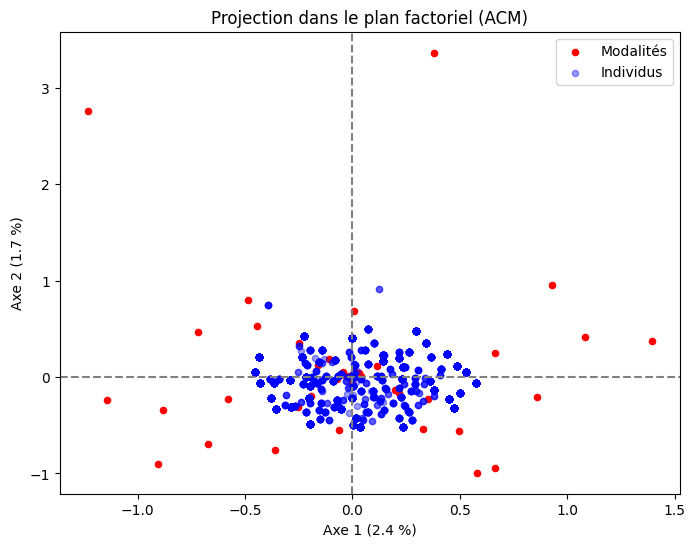

In [196]:
coord_ind = mca.row_coordinates(tdc_new)
coord_var = mca.column_coordinates(tdc_new)

# Affichage
fig, ax = plt.subplots(figsize=(8, 6))
coord_var.plot(kind='scatter', x=0, y=1, ax=ax, color='red', label='Modalités')
coord_ind.plot(kind='scatter', x=0, y=1, ax=ax, color='blue', alpha=0.4, label='Individus')

ax.axhline(0, color='grey', linestyle='--')
ax.axvline(0, color='grey', linestyle='--')
ax.set_xlabel(f'Axe 1 ({var_exp[0]:.1f} %)')
ax.set_ylabel(f'Axe 2 ({var_exp[1]:.1f} %)')
ax.set_title('Projection dans le plan factoriel (ACM)')
ax.legend()
plt.show()

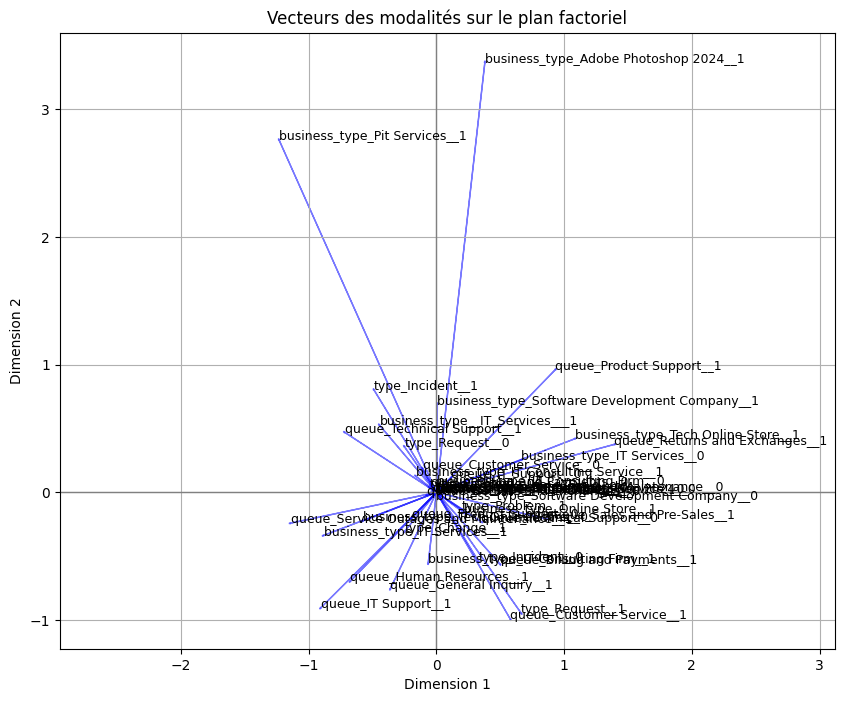

In [198]:

coord_modalites = mca.column_coordinates(tdc_new)

# Tracé
plt.figure(figsize=(10, 8))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Tracer les vecteurs
for i in range(coord_modalites.shape[0]):
    x = coord_modalites.iloc[i, 0]
    y = coord_modalites.iloc[i, 1]
    plt.arrow(0, 0, x, y, color='blue', alpha=0.5, head_width=0.01)
    plt.text(x, y, coord_modalites.index[i], fontsize=9)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Vecteurs des modalités sur le plan factoriel')
plt.grid(True)
plt.axis('equal')  # Pour garder les bonnes proportions
plt.show()


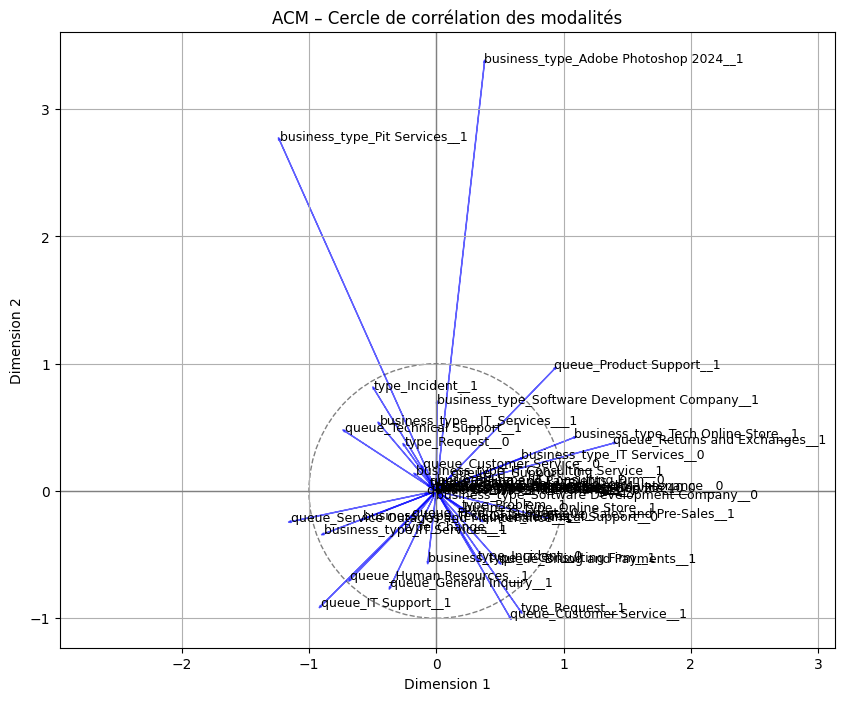

In [199]:
# Tracer les vecteurs des modalités avec cercle de corrélation
plt.figure(figsize=(10, 8))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Cercle de corrélation
circle = plt.Circle((0, 0), 1, color='grey', fill=False, linestyle='--')
plt.gca().add_patch(circle)

# Tracer les vecteurs
for i in range(coord_modalites.shape[0]):
    x = coord_modalites.iloc[i, 0]
    y = coord_modalites.iloc[i, 1]
    plt.arrow(0, 0, x, y, color='blue', alpha=0.6, head_width=0.015)
    plt.text(x, y, coord_modalites.index[i], fontsize=9)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('ACM – Cercle de corrélation des modalités')
plt.grid(True)
plt.axis('equal')  # pour que le cercle soit bien rond
plt.show()

In [200]:
mca.column_contributions_

0             1  \
type_Change__0                                 3.682459e-04  7.702714e-04   
type_Change__1                                 2.964296e-03  6.200510e-03   
type_Incident__0                               2.725170e-02  1.022851e-01   
type_Incident__1                               4.053860e-02  1.521554e-01   
type_Problem__0                                9.675271e-04  6.187985e-04   
type_Problem__1                                3.569528e-03  2.282953e-03   
type_Request__0                                1.923982e-02  5.460877e-02   
type_Request__1                                5.091448e-02  1.445116e-01   
queue_Billing and Payments__0                  8.111131e-04  1.445819e-03   
queue_Billing and Payments__1                  8.787858e-03  1.566446e-02   
queue_Customer Service__0                      4.124194e-03  1.694525e-02   
queue_Customer Service__1                      2.218645e-02  9.115841e-02   
queue_General Inquiry__0                       1.056629e-05  6.427946e-05   
queue_General Inquiry__1                       7.578915e-04  4.610590e-03   
queue_Human Resources__0                       3.421451e-05  5.071163e-05   
queue_Human Resources__1                       2.548012e-03  3.776581e-03   
queue_IT Support__0                            4.828795e-03  6.707880e-03   
queue_IT Support__1                            3.857611e-02  5.358767e-02   
queue_Product Support__0                       1.313728e-02  1.955206e-02   
queue_Product Support__1                       6.302085e-02  9.379322e-02   
queue_Returns and Exchanges__0                 2.093566e-03  2.127651e-04   
queue_Returns and Exchanges__1                 4.041539e-02  4.107339e-03   
queue_Sales and Pre-Sales__0                   3.807703e-04  3.133612e-05   
queue_Sales and Pre-Sales__1                   1.073661e-02  8.835872e-04   
queue_Service Outages and Maintenance__0       7.097657e-04  4.405775e-05   
queue_Service Outages and Maintenance__1       1.942543e-02  1.205808e-03   
queue_Technical Support__0                     3.515629e-02  2.102941e-02   
queue_Technical Support__1                     7.162060e-02  4.284124e-02   
business_type_Adobe Photoshop 2024__0          1.519158e-08  1.674268e-06   
business_type_Adobe Photoshop 2024__1          3.036797e-05  3.346862e-03   
business_type_IT Consulting Firm__0            1.873169e-05  1.909616e-03   
business_type_IT Consulting Firm__1            1.728968e-04  1.762610e-02   
business_type_IT Consulting Service__0         3.361403e-08  2.911345e-08   
business_type_IT Consulting Service__1         1.917440e-05  1.660714e-05   
business_type_IT Services__0                   1.063158e-01  2.159806e-02   
business_type_IT Services__1                   1.415066e-01  2.874707e-02   
business_type_Online Store__0                  3.779637e-05  2.920791e-05   
business_type_Online Store__1                  8.463291e-04  6.540180e-04   
business_type_Pit Services__0                  1.004090e-06  7.026737e-06   
business_type_Pit Services__1                  8.022677e-04  5.614363e-03   
business_type_Software Development Company__0  1.279023e-07  1.835372e-03   
business_type_Software Development Company__1  1.517143e-06  2.177069e-02   
business_type_Tech Online Store__0             9.242898e-02  1.939598e-02   
business_type_Tech Online Store__1             1.726003e-01  3.621972e-02   
business_type__IT_Services___0                 2.100857e-08  4.083461e-08   
business_type__IT_Services___1                 4.199613e-05  8.162838e-05   

                                                          2             3  \
type_Change__0                                 4.302653e-02  2.657201e-04   
type_Change__1                                 3.463538e-01  2.138987e-03   
type_Incident__0                               1.219881e-02  2.606114e-02   
type_Incident__1                               1.814648e-02  3.876756e-02   
type_Problem__0                                3.2466

In [201]:
contrib = mca.column_contributions_
contrib.index = contrib.index.str.replace(r'_\d+$', '', regex=True)
# Regrouper les lignes par modalité
contrib_grouped = contrib.groupby(contrib.index).sum()
contrib_grouped*100

0          1          2  \
business_type_Adobe Photoshop 2024_           0.003038   0.334854   0.045024   
business_type_IT Consulting Firm_             0.019163   1.953571   0.411732   
business_type_IT Consulting Service_          0.001921   0.001664   0.384800   
business_type_IT Services_                   24.782245   5.034514   1.640717   
business_type_Online Store_                   0.088413   0.068323   0.763397   
business_type_Pit Services_                   0.080327   0.562139   0.274294   
business_type_Software Development Company_   0.000165   2.360607  17.882619   
business_type_Tech Online Store_             26.502932   5.561570   2.950185   
business_type__IT_Services__                  0.004202   0.008167   0.111388   
queue_Billing and Payments_                   0.959897   1.711028   0.117099   
queue_Customer Service_                       2.631065  10.810366   6.033691   
queue_General Inquiry_                        0.076846   0.467487   1.601229   
queue_Human Resources_                        0.258223   0.382729   0.219783   
queue_IT Support_                             4.340490   6.029555   1.484578   
queue_Product Support_                        7.615812  11.334528   6.132587   
queue_Returns and Exchanges_                  4.250896   0.432010   1.082375   
queue_Sales and Pre-Sales_                    1.111738   0.091492   3.545549   
queue_Service Outages and Maintenance_        2.013520   0.124987   3.621113   
queue_Technical Support_                     10.677688   6.387065   6.413202   
type_Change_                                  0.333254   0.697078  38.938037   
type_Incident_                                6.779030  25.444054   3.034529   
type_Problem_                                 0.453706   0.290175   1.522439   
type_Request_                                 7.015430  19.912039   1.789631   

                                                     3          4  
business_type_Adobe Photoshop 2024_           0.012388   0.565319  
business_type_IT Consulting Firm_            18.023523   5.310760  
business_type_IT Consulting Service_          0.000383   1.277372  
business_type_IT Services_                    4.525172   4.931744  
business_type_Online Store_                   0.168843   1.737135  
business_type_Pit Services_                   0.507609   0.191410  
business_type_Software Development Company_   1.699269  10.433085  
business_type_Tech Online Store_              1.054297   2.756798  
business_type__IT_Services__                  0.339305   1.634956  
queue_Billing and Payments_                   0.008596   0.000078  
queue_Customer Service_                       1.905810   0.000416  
queue_General Inquiry_                        0.312588   0.114139  
queue_Human Resources_                        0.551377   0.119185  
queue_IT Support_                             6.371963   5.078397  
queue_Product Support_                        1.819655   3.512437  
queue_Returns and Exchanges_                  2.657527   0.594119  
queue_Sales and Pre-Sales_                    3.649731   0.768957  
queue_Service Outages and Maintenance_        0.169714  11.678750  
queue_Technical Support_                      2.263094  18.926585  
type_Change_                                  0.240471   0.018832  
type_Incident_                                6.482870   8.807182  
type_Problem_                                37.293430  20.548699  
type_Request_                                 9.942386   0.993646

Les résultats ne donnent pas quelque chose de satisfaisant à exploiter.

# Let's go pour le traitement des questions et responses

In [5]:
df=make_clean("data/aa_dataset-tickets-multi-lang-5-2-50-version.csv")
df_body = df.filter(pl.col("language") == "en")
df_body=df_body["body"]
df_body

No difference between after cleaning


shape: (16_338,)
Series: 'body' [str]
[
	"Dear Customer Support Team,\n\…
	"Dear Customer Support Team,\n\…
	"Dear Customer Support Team,\n\…
	"Dear Support Team,\n\nI hope t…
	"Dear Customer Support,\n\nI ho…
	…
	"An unexpected billing discrepa…
	"A data breach has occurred, wh…
	"The data analytics tool experi…
	"Requesting an update on the in…
	"Looking for detailed informati…
]

In [6]:
request= list(df_body)
request

['Dear Customer Support Team,\\n\\nI am writing to report a significant problem with the centralized account management portal, which currently appears to be offline. This outage is blocking access to account settings, leading to substantial inconvenience. I have attempted to log in multiple times using different browsers and devices, but the issue persists.\\n\\nCould you please provide an update on the outage status and an estimated time for resolution? Also, are there any alternative ways to access and manage my account during this downtime?',
 'Dear Customer Support Team,\\n\\nI hope this message reaches you well. I am reaching out to request detailed information about the capabilities of your smart home integration products listed on your website. As a potential customer aiming to develop a seamlessly interconnected home environment, it is essential to understand how your products interact with various smart home platforms.\\n\\nCould you kindly provide detailed compatibility info

In [7]:
request[2]

'Dear Customer Support Team,\\n\\nI hope this message finds you well. I am reaching out to request clarification about the billing and payment procedures linked to my account. Recently, I observed some inconsistencies in the charges applied and would like to ensure I fully understand the billing cycle, accepted payment options, and any potential extra charges.\\n\\nFirstly, I would be grateful if you could provide a detailed explanation of how the billing cycle functions. Specifically, I am interested in knowing the start and end dates.\\n\\nThank you for your assistance regarding these billing inquiries.'

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
Vect=CountVectorizer(stop_words="english") # si besoin d'intégrer tous les stop_words, remplacer "english" par None 
Vect.fit(request)
Vect.get_feature_names_out()

array(['00', '000', '04', ..., 'zurückzuführen', 'zusammenbruch',
       'überprüft'], dtype=object)

In [10]:
print(Vect.get_feature_names_out()[:52])

['00' '000' '04' '06' '10' '100' '11' '12' '1234567890' '13' '14' '15'
 '16' '16gb' '17' '18' '19' '19c' '1tb' '20' '2000' '2019' '2021' '2022'
 '2023' '20mb' '20th' '22' '23456' '24' '2530' '27' '27001' '28' '32'
 '32gb' '35' '360' '365' '3d' '453d' '48' '48g' '4k' '500w' '5950x' '6800'
 '6tb' '71' '82' '895l' 'aber']


Nous faisons l'hypothèse que Les premières valeurs du vocabulaire n'apporteraient rien à l'apprentissage. Nous allons donc les supprimer

In [11]:
from sklearn.feature_extraction import text

In [12]:
# 1. Récupérer les stop words anglais par défaut
default_stopwords = text.ENGLISH_STOP_WORDS

# 2. Ajouter tes propres stop words
custom_stopwords = list(default_stopwords.union(set(Vect.get_feature_names_out()[:51])))

# 3. Créer le vectorizer avec la liste combinée
vect = CountVectorizer(stop_words=custom_stopwords)

# 4. Utiliser normalement
vect.fit(request)
vect.get_feature_names_out()

array(['aber', 'abilities', 'ability', ..., 'zurückzuführen',
       'zusammenbruch', 'überprüft'], dtype=object)

In [13]:
from sklearn.feature_extraction.text import TfidfTransformer

In [14]:
train_dtm = vect.transform(request)
train_dtm.toarray()

tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(train_dtm)
train_tfidf=tfidf_transformer.transform(train_dtm)


In [15]:
from sklearn.metrics.pairwise import cosine_similarity

*Penser à utiliser des corpus contenant des mots et leurs synonymes. Ils peuvent servir au cas où certains mots ne se retrouvent pas dans le vocabulaire retenu afin de les remplacer*

Prochaines tâches:


*1- Proposer des requêtes similaires et analyser les réponses*

*2- On peut classer les requêtes par département d'assignation: Rassembleer les requêtes similaires et ressortir les départements les plus sollicités repondant à chaque groupe de requêtes similaires. Ainsi, un utilisateur pourrait être orienté si ce dernier ne sait à qui s'adresser"*

## Proposer des requêtes similaires

In [16]:
similarity = cosine_similarity(train_tfidf, train_tfidf[472])

sorted_indices = [i for i, v in sorted(enumerate(similarity), key=lambda x: x[1], reverse=True)]

valeurs_tries = sorted(similarity, reverse=True)

print(sorted_indices[1:11])

[0, 453, 419, 537, 496, 252, 160, 476, 411, 384]


In [17]:
print(valeurs_tries[1:11])

[array([0.77333149]), array([0.51569693]), array([0.38719266]), array([0.38527636]), array([0.36712663]), array([0.32476156]), array([0.31105098]), array([0.30884606]), array([0.30844032]), array([0.28384273])]


In [18]:
request[453]

'Dear Customer Support Team,\\n\\nI am submitting a report regarding a problem with the Account Control Center, which seems to be temporarily unavailable. I cannot access key account features, and this outage is affecting my ability to manage services efficiently. Could you please provide an update on the status of the outage and an estimated time for resolution?\\n\\nIn addition, please share any recommended alternative methods to access account management functions during this downtime, as I depend heavily on this service for daily operations.'

In [19]:
request[0]

'Dear Customer Support Team,\\n\\nI am writing to report a significant problem with the centralized account management portal, which currently appears to be offline. This outage is blocking access to account settings, leading to substantial inconvenience. I have attempted to log in multiple times using different browsers and devices, but the issue persists.\\n\\nCould you please provide an update on the outage status and an estimated time for resolution? Also, are there any alternative ways to access and manage my account during this downtime?'

## Classification des requêtes par département d'assignation

In [20]:
from sklearn.naive_bayes import MultinomialNB

In [21]:
Y_train=list(df.filter(pl.col("language")=="en")["queue"])

In [22]:
print(Y_train)

['Technical Support', 'Returns and Exchanges', 'Billing and Payments', 'Sales and Pre-Sales', 'Technical Support', 'Service Outages and Maintenance', 'Technical Support', 'Product Support', 'IT Support', 'Product Support', 'Product Support', 'Customer Service', 'Technical Support', 'Customer Service', 'Service Outages and Maintenance', 'Technical Support', 'Technical Support', 'Human Resources', 'Billing and Payments', 'IT Support', 'Technical Support', 'Technical Support', 'Technical Support', 'Customer Service', 'Billing and Payments', 'Technical Support', 'Customer Service', 'Billing and Payments', 'Technical Support', 'Technical Support', 'General Inquiry', 'Product Support', 'Technical Support', 'Customer Service', 'Technical Support', 'Customer Service', 'Returns and Exchanges', 'IT Support', 'Technical Support', 'Customer Service', 'Customer Service', 'Customer Service', 'Billing and Payments', 'Customer Service', 'Technical Support', 'IT Support', 'Technical Support', 'Product 

In [23]:
len(Y_train)

16338

In [24]:
train_tfidf.shape

(16338, 4768)

In [25]:
# Entraînement
model = MultinomialNB()
model.fit(train_tfidf, Y_train)  # C'est ça que le modèle apprend

MultinomialNB()

In [26]:
model.predict(train_tfidf[0])

array(['Technical Support'], dtype='<U31')

In [27]:
from sklearn.metrics import accuracy_score

# Étape 1 : prédictions
y_pred = model.predict(train_tfidf)

# Étape 2 : évaluer l'accuracy
acc = accuracy_score(Y_train, y_pred)

print(f"Accuracy: {acc:.2f}")


Accuracy: 0.43


In [28]:
from sklearn.metrics import classification_report, f1_score

# F1-score global (moyenne pondérée si multi-classes)
f1 = f1_score(Y_train, y_pred, average='weighted')  # ou 'macro', 'micro'

print(f"F1-score : {f1:.2f}")

# Rapport complet (précision, rappel, F1)
print(classification_report(Y_train, y_pred))


F1-score : 0.38
                                 precision    recall  f1-score   support

           Billing and Payments       0.92      0.59      0.72      1595
               Customer Service       0.31      0.44      0.37      2410
                General Inquiry       0.00      0.00      0.00       236
                Human Resources       0.91      0.03      0.06       348
                     IT Support       0.87      0.06      0.12      1942
                Product Support       0.44      0.31      0.36      3073
          Returns and Exchanges       1.00      0.05      0.09       820
            Sales and Pre-Sales       1.00      0.02      0.04       513
Service Outages and Maintenance       0.97      0.06      0.11       664
              Technical Support       0.41      0.82      0.54      4737

                       accuracy                           0.43     16338
                      macro avg       0.68      0.24      0.24     16338
                   weighted avg  

D:\AI experiments\Customer_IT_Support-Ticket_Dataset\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\AI experiments\Customer_IT_Support-Ticket_Dataset\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
D:\AI experiments\Customer_IT_Support-Ticket_Dataset\lib\site-packages\sklearn\metrics\_classification.py:1706: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

In [29]:
model.predict_proba(train_tfidf)[1]

array([0.0831199 , 0.1685524 , 0.01808536, 0.01653253, 0.10283519,
       0.22398851, 0.09373752, 0.08298052, 0.02283174, 0.18733633])

In [30]:
Y_train[1]

'Returns and Exchanges'

In [31]:
model.predict(train_tfidf[1])

array(['Product Support'], dtype='<U31')

### Essayons de voir le gain de performance avec le modèle Xgboost 

In [32]:
from xgboost import XGBClassifier

In [33]:
Y_train

['Technical Support',
 'Returns and Exchanges',
 'Billing and Payments',
 'Sales and Pre-Sales',
 'Technical Support',
 'Service Outages and Maintenance',
 'Technical Support',
 'Product Support',
 'IT Support',
 'Product Support',
 'Product Support',
 'Customer Service',
 'Technical Support',
 'Customer Service',
 'Service Outages and Maintenance',
 'Technical Support',
 'Technical Support',
 'Human Resources',
 'Billing and Payments',
 'IT Support',
 'Technical Support',
 'Technical Support',
 'Technical Support',
 'Customer Service',
 'Billing and Payments',
 'Technical Support',
 'Customer Service',
 'Billing and Payments',
 'Technical Support',
 'Technical Support',
 'General Inquiry',
 'Product Support',
 'Technical Support',
 'Customer Service',
 'Technical Support',
 'Customer Service',
 'Returns and Exchanges',
 'IT Support',
 'Technical Support',
 'Customer Service',
 'Customer Service',
 'Customer Service',
 'Billing and Payments',
 'Customer Service',
 'Technical Support',


In [34]:
modalite = sorted(set(Y_train))
codification_modalite = dict(zip(modalite,[i for i in range(len(modalite))]))

In [35]:
codification_modalite

{'Billing and Payments': 0,
 'Customer Service': 1,
 'General Inquiry': 2,
 'Human Resources': 3,
 'IT Support': 4,
 'Product Support': 5,
 'Returns and Exchanges': 6,
 'Sales and Pre-Sales': 7,
 'Service Outages and Maintenance': 8,
 'Technical Support': 9}

In [36]:
Y_train_codif = [codification_modalite[f"{key}"] for key in Y_train]

In [37]:
print(Y_train_codif)

[9, 6, 0, 7, 9, 8, 9, 5, 4, 5, 5, 1, 9, 1, 8, 9, 9, 3, 0, 4, 9, 9, 9, 1, 0, 9, 1, 0, 9, 9, 2, 5, 9, 1, 9, 1, 6, 4, 9, 1, 1, 1, 0, 1, 9, 4, 9, 5, 1, 5, 1, 4, 4, 9, 5, 9, 6, 9, 9, 4, 0, 9, 4, 8, 3, 0, 9, 9, 9, 4, 8, 9, 4, 4, 9, 9, 2, 1, 0, 4, 9, 0, 9, 0, 8, 9, 8, 5, 6, 7, 5, 4, 8, 1, 1, 5, 9, 1, 1, 4, 9, 4, 9, 5, 1, 9, 5, 9, 3, 0, 1, 9, 0, 5, 0, 9, 1, 9, 9, 4, 3, 2, 1, 1, 9, 2, 4, 5, 9, 9, 1, 9, 4, 9, 4, 5, 8, 5, 9, 4, 4, 7, 1, 8, 5, 5, 5, 4, 9, 9, 9, 4, 5, 9, 5, 9, 0, 5, 5, 5, 9, 6, 5, 5, 1, 9, 9, 9, 7, 0, 6, 5, 1, 1, 5, 1, 9, 4, 5, 5, 9, 9, 5, 9, 9, 5, 5, 5, 9, 5, 5, 1, 7, 5, 9, 9, 9, 7, 0, 5, 0, 1, 9, 7, 7, 9, 4, 0, 5, 5, 9, 4, 9, 5, 9, 4, 4, 9, 8, 1, 9, 9, 9, 9, 5, 2, 9, 9, 4, 6, 1, 1, 9, 5, 4, 0, 9, 8, 9, 5, 9, 9, 0, 2, 1, 9, 8, 4, 1, 7, 2, 8, 9, 5, 5, 5, 9, 5, 5, 9, 4, 1, 9, 8, 4, 1, 1, 5, 1, 4, 5, 8, 5, 0, 5, 5, 8, 1, 7, 8, 5, 1, 2, 1, 0, 1, 9, 0, 5, 6, 5, 8, 9, 4, 5, 1, 4, 5, 9, 6, 1, 5, 3, 1, 9, 2, 1, 1, 5, 1, 1, 5, 9, 9, 9, 4, 9, 1, 0, 5, 5, 5, 1, 9, 8, 9, 7, 6, 9, 5, 0, 5, 0, 

In [43]:
import os
print(os.getcwd())

D:\AI experiments\Customer_IT_Support-Ticket_Dataset


In [48]:
from gensim.models.fasttext import load_facebook_model

# Chemin vers ton fichier .bin téléchargé
model_path = "cc.en.300.bin/cc.en.300.bin"

# Charger le modèle FastText pré-entraîné
model = load_facebook_model(model_path)


KeyboardInterrupt: 

In [187]:
import xgboost as xgb


In [191]:
train_tfidf

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 472302 stored elements and shape (16338, 4768)>

In [194]:
len(Y_train_codif)

16338

In [175]:
df_test = make_clean("data/dataset-tickets-multi-lang3-4k.csv")
df_test=df_test.filter(pl.col("language")=="en")
df_test

Some elements have been dropped during cleaning


shape: (1_390, 16)
┌───────────────┬───────────────┬───────────────┬──────────┬───┬───────────────┬───────────────┬──────────────┬────────┐
│ subject       ┆ body          ┆ answer        ┆ type     ┆ … ┆ tag_5         ┆ tag_6         ┆ tag_7        ┆ tag_8  │
│ ---           ┆ ---           ┆ ---           ┆ ---      ┆   ┆ ---           ┆ ---           ┆ ---          ┆ ---    │
│ str           ┆ str           ┆ str           ┆ str      ┆   ┆ str           ┆ str           ┆ str          ┆ str    │
╞═══════════════╪═══════════════╪═══════════════╪══════════╪═══╪═══════════════╪═══════════════╪══════════════╪════════╡
│ Urgent        ┆ Dear IT       ┆ Dear <name>,  ┆ Request  ┆ … ┆ Problem       ┆ Technical     ┆ Performance  ┆ null   │
│ Assistance    ┆ Services      ┆               ┆          ┆   ┆ Resolution    ┆ Guidance      ┆ Tuning       ┆        │
│ Required: AW… ┆ Support       ┆ Thank you for ┆          ┆   ┆               ┆               ┆              ┆        │
│               ┆ Team,…        ┆ re…           ┆          ┆   ┆               ┆               ┆              ┆        │
│ Urgent: Issue ┆ Dear Customer ┆ Dear <name>,  ┆ Incident ┆ … ┆ Software Bug  ┆ null          ┆ null         ┆ null   │
│ with Zoom     ┆ Support,      ┆               ┆          ┆   ┆               ┆               ┆              ┆        │
│ Screen…       ┆               ┆ Thank you for ┆          ┆   ┆               ┆               ┆              ┆        │
│               ┆ I am e…       ┆ re…           ┆          ┆   ┆               ┆               ┆              ┆        │
│ Service       ┆ Dear IT       ┆ Dear <name>,  ┆ Change   ┆ … ┆ Service       ┆ System        ┆ Performance  ┆ Urgent │
│ outage        ┆ Services      ┆               ┆          ┆   ┆ Recovery      ┆ Maintenance   ┆ Tuning       ┆ Issue  │
│ resolution    ┆ Customer      ┆ Thank you for ┆          ┆   ┆               ┆               ┆              ┆        │
│ requ…         ┆ Supp…         ┆ re…           ┆          ┆   ┆               ┆               ┆              ┆        │
│ Surface Pro 7 ┆ Dear Tech     ┆ Dear <name>,  ┆ Incident ┆ … ┆ Problem       ┆ Service       ┆ null         ┆ null   │
│ Issue         ┆ Online Store  ┆               ┆          ┆   ┆ Resolution    ┆ Recovery      ┆              ┆        │
│               ┆ Support…      ┆ Thank you for ┆          ┆   ┆               ┆               ┆              ┆        │
│               ┆               ┆ re…           ┆          ┆   ┆               ┆               ┆              ┆        │
│ Request for   ┆ Dear Customer ┆ Dear <name>,  ┆ Request  ┆ … ┆ Urgent Issue  ┆ null          ┆ null         ┆ null   │
│ software      ┆ Support,      ┆               ┆          ┆   ┆               ┆               ┆              ┆        │
│ developme…    ┆               ┆ Thank you for ┆          ┆   ┆               ┆               ┆              ┆        │
│               ┆ I hope…       ┆ re…           ┆          ┆   ┆               ┆               ┆              ┆        │
│ …             ┆ …             ┆ …             ┆ …        ┆ … ┆ …             ┆ …             ┆ …            ┆ …      │
│ Urgent        ┆ Hello         ┆ Subject: Re:  ┆ Request  ┆ … ┆ Product       ┆ null          ┆ null         ┆ null   │
│ Assistance    ┆ Customer      ┆ Urgent        ┆          ┆   ┆ Support       ┆               ┆              ┆        │
│ Required for… ┆ Support Team, ┆ Assistance…   ┆          ┆   ┆               ┆               ┆              ┆        │
│               ┆               ┆               ┆          ┆   ┆               ┆               ┆              ┆        │
│               ┆ …             ┆               ┆          ┆   ┆               ┆               ┆              ┆        │
│ Urgent Server ┆ Dear Customer ┆ Dear <name>,  ┆ Problem  ┆ … ┆ Incident      ┆ Technical     ┆ Service      ┆ null   │
│ Downtime      ┆ Support Team, ┆               ┆          ┆   ┆ Report        ┆ Support       ┆ Recovery    

In [242]:
Y_test=list(df_test.filter(pl.col("language")=="en")["queue"])

In [243]:
# Verification qu'on a les mêmes libellés
print(sorted(set(Y_train)))
print(sorted(set(Y_test)))

['Billing and Payments', 'Customer Service', 'General Inquiry', 'Human Resources', 'IT Support', 'Product Support', 'Returns and Exchanges', 'Sales and Pre-Sales', 'Service Outages and Maintenance', 'Technical Support']
['Billing and Payments', 'Customer Service', 'General Inquiry', 'Human Resources', 'IT Support', 'Product Support', 'Returns and Exchanges', 'Sales and Pre-Sales', 'Service Outages and Maintenance', 'Technical Support']


In [244]:
codification_modalite

{'Billing and Payments': 0,
 'Customer Service': 1,
 'General Inquiry': 2,
 'Human Resources': 3,
 'IT Support': 4,
 'Product Support': 5,
 'Returns and Exchanges': 6,
 'Sales and Pre-Sales': 7,
 'Service Outages and Maintenance': 8,
 'Technical Support': 9}

In [245]:
Y_test_codif = [codification_modalite[f"{key}"] for key in Y_test]

In [216]:
from xgboost.callback import TrainingCallback

In [239]:
def f1_eval_multiclass(preds, dtrain):
    labels = dtrain.get_label().astype(int)
    n_classes = params['num_class']
    f1 = f1_score(labels, preds, average='macro')
    return 'f1_macro', f1


In [176]:
request_test = list(df_test["body"])
request_test

['Dear IT Services Support Team, \n\nI am reaching out regarding a high-priority ticket related to our AWS Management Service. We are experiencing significant challenges in deploying services and optimizing our cloud infrastructure costs. It is crucial for us to gain clarity and efficient solutions on this matter. \n\nWe have been noticing higher-than-expected expenditure, and the deployment process appears to have several hurdles that prevent smooth operation. As this is affecting our operational efficiency and financial planning, your expert assistance is urgently requested. \n\nCould you please prioritize this ticket and guide us on the best practices to streamline deployment and manage costs effectively on AWS? Your prompt response will greatly aid in mitigating potential losses and optimizing current systems. \n\nThank you for your immediate attention and expertise.\n\nBest regards, \n\n<name>\n<acc_num>\n<name@example.com>\n<tel_num>',
 'Dear Customer Support,\n\nI am experiencin

In [248]:
params = {
    'objective': 'multi:softmax',
    'eval_metric': 'mlogloss',
    "num_class": len(np.unique(Y_train_codif))
}

params["verbosity"]=1
# Exemple de DMatrix
dtrain = xgb.DMatrix(train_tfidf, label=np.array(Y_train_codif).astype(float))

test_dtm = vect.transform(request_test)
test_dtm.toarray()
test_tfidf = tfidf_transformer.transform(test_dtm)
dtest = xgb.DMatrix(test_tfidf, label=np.array(Y_test_codif).astype(float))

bst = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=200,
    evals=[(dtrain, 'train'), (dtest, 'valid')],
    custom_metric=f1_eval_multiclass,
    verbose_eval=1
)


[0]	train-mlogloss:2.01639	train-f1_macro:0.36812	valid-mlogloss:2.05883	valid-f1_macro:0.24754
[1]	train-mlogloss:1.86809	train-f1_macro:0.40957	valid-mlogloss:1.94212	valid-f1_macro:0.29364
[2]	train-mlogloss:1.76710	train-f1_macro:0.41990	valid-mlogloss:1.86187	valid-f1_macro:0.27039
[3]	train-mlogloss:1.68869	train-f1_macro:0.43184	valid-mlogloss:1.81081	valid-f1_macro:0.27992
[4]	train-mlogloss:1.62339	train-f1_macro:0.44963	valid-mlogloss:1.78002	valid-f1_macro:0.26301
[5]	train-mlogloss:1.57115	train-f1_macro:0.46416	valid-mlogloss:1.74953	valid-f1_macro:0.25807
[6]	train-mlogloss:1.52701	train-f1_macro:0.47466	valid-mlogloss:1.73392	valid-f1_macro:0.25185
[7]	train-mlogloss:1.48756	train-f1_macro:0.48686	valid-mlogloss:1.72617	valid-f1_macro:0.24644
[8]	train-mlogloss:1.45296	train-f1_macro:0.49777	valid-mlogloss:1.71812	valid-f1_macro:0.25020
[9]	train-mlogloss:1.42040	train-f1_macro:0.51049	valid-mlogloss:1.70479	valid-f1_macro:0.24995
[10]	train-mlogloss:1.39250	train-f1_mac

In [173]:
model = XGBClassifier(n_estimators=100, use_label_encoder=False, eval_metric='logloss')

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=True  # affiche la logloss à chaque étape
)

model_xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model_xgb.fit(train_tfidf, Y_train_codif)

y_pred = model_xgb.predict(train_tfidf)
print(f"F1-score : {f1_score(Y_train_codif, y_pred, average='weighted'):.2f}")

D:\AI experiments\Customer_IT_Support-Ticket_Dataset\lib\site-packages\xgboost\training.py:183: UserWarning: [13:43:32] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


F1-score : 0.87


In [174]:
print(classification_report(Y_train_codif,  y_pred))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1595
           1       0.88      0.79      0.83      2410
           2       1.00      0.94      0.97       236
           3       0.99      0.87      0.93       348
           4       0.98      0.75      0.85      1942
           5       0.91      0.81      0.86      3073
           6       1.00      0.80      0.89       820
           7       0.99      0.88      0.93       513
           8       0.99      0.95      0.97       664
           9       0.75      0.97      0.84      4737

    accuracy                           0.87     16338
   macro avg       0.95      0.87      0.90     16338
weighted avg       0.89      0.87      0.87     16338



_Sur les données d'entrainement, nous sommes passés d'un F1-score de 0.38 à 0.87 entre le modèle Naive Bayes et le modèle XGBoost. Tous les entrainement ont été réalisés sur un CPU pour une matrice sparse TF-IDF de taille (16338, 4768) pour des temps d'entrainement de moins de 30s_

### Validation du modèle Xgboost

In [177]:
vect

CountVectorizer(stop_words=['ours', 'toward', 'nine', 'last', 'yourselves',
                            'have', 'onto', 'both', 'cry', 'must', '22', 'not',
                            'call', 'seemed', 'nevertheless', 'get', 'namely',
                            'whereupon', '360', 'rather', 'a', 'there',
                            'twelve', 'became', 'same', 'wherever', 'than',
                            '2022', 'put', 'over', ...])

In [178]:
len(request_test)

1390

In [179]:
test_dtm = vect.transform(request_test)
test_dtm.toarray()

test_tfidf = tfidf_transformer.transform(test_dtm)

In [183]:
print(Y_train_codif)

[9, 6, 0, 7, 9, 8, 9, 5, 4, 5, 5, 1, 9, 1, 8, 9, 9, 3, 0, 4, 9, 9, 9, 1, 0, 9, 1, 0, 9, 9, 2, 5, 9, 1, 9, 1, 6, 4, 9, 1, 1, 1, 0, 1, 9, 4, 9, 5, 1, 5, 1, 4, 4, 9, 5, 9, 6, 9, 9, 4, 0, 9, 4, 8, 3, 0, 9, 9, 9, 4, 8, 9, 4, 4, 9, 9, 2, 1, 0, 4, 9, 0, 9, 0, 8, 9, 8, 5, 6, 7, 5, 4, 8, 1, 1, 5, 9, 1, 1, 4, 9, 4, 9, 5, 1, 9, 5, 9, 3, 0, 1, 9, 0, 5, 0, 9, 1, 9, 9, 4, 3, 2, 1, 1, 9, 2, 4, 5, 9, 9, 1, 9, 4, 9, 4, 5, 8, 5, 9, 4, 4, 7, 1, 8, 5, 5, 5, 4, 9, 9, 9, 4, 5, 9, 5, 9, 0, 5, 5, 5, 9, 6, 5, 5, 1, 9, 9, 9, 7, 0, 6, 5, 1, 1, 5, 1, 9, 4, 5, 5, 9, 9, 5, 9, 9, 5, 5, 5, 9, 5, 5, 1, 7, 5, 9, 9, 9, 7, 0, 5, 0, 1, 9, 7, 7, 9, 4, 0, 5, 5, 9, 4, 9, 5, 9, 4, 4, 9, 8, 1, 9, 9, 9, 9, 5, 2, 9, 9, 4, 6, 1, 1, 9, 5, 4, 0, 9, 8, 9, 5, 9, 9, 0, 2, 1, 9, 8, 4, 1, 7, 2, 8, 9, 5, 5, 5, 9, 5, 5, 9, 4, 1, 9, 8, 4, 1, 1, 5, 1, 4, 5, 8, 5, 0, 5, 5, 8, 1, 7, 8, 5, 1, 2, 1, 0, 1, 9, 0, 5, 6, 5, 8, 9, 4, 5, 1, 4, 5, 9, 6, 1, 5, 3, 1, 9, 2, 1, 1, 5, 1, 1, 5, 9, 9, 9, 4, 9, 1, 0, 5, 5, 5, 1, 9, 8, 9, 7, 6, 9, 5, 0, 5, 0, 

In [186]:
y_pred = model_xgb.predict(test_tfidf)
print(classification_report(Y_test_codif,  y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       120
           1       0.21      0.10      0.14       213
           2       0.00      0.00      0.00        15
           3       0.25      0.07      0.11        15
           4       0.11      0.04      0.05       167
           5       0.27      0.12      0.16       234
           6       0.54      0.29      0.38        65
           7       0.71      0.12      0.20        42
           8       0.19      0.57      0.29        51
           9       0.39      0.67      0.49       468

    accuracy                           0.37      1390
   macro avg       0.35      0.28      0.26      1390
weighted avg       0.35      0.37      0.32      1390



# Traitement des SUBJECT by Spacy et Gensim

In [14]:
import spacy
import gensim
import pyLDAvis.gensim_models
import pyLDAvis

from gensim import corpora
from pprint import pprint

In [5]:
df=ppd.make_clean("data/aa_dataset-tickets-multi-lang-5-2-50-version.csv")
df=pd.DataFrame(df, columns=df.columns)

No difference between after cleaning


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28587 entries, 0 to 28586
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   24749 non-null  object
 1   body      28587 non-null  object
 2   answer    28580 non-null  object
 3   type      28587 non-null  object
 4   queue     28587 non-null  object
 5   priority  28587 non-null  object
 6   language  28587 non-null  object
 7   version   28587 non-null  object
 8   tag_1     28587 non-null  object
 9   tag_2     28574 non-null  object
 10  tag_3     28451 non-null  object
 11  tag_4     25529 non-null  object
 12  tag_5     14545 non-null  object
 13  tag_6     5874 non-null   object
 14  tag_7     2040 non-null   object
 15  tag_8     565 non-null    object
dtypes: object(16)
memory usage: 3.5+ MB


In [6]:
df_10000 = df[(df["language"]=="en") & (df["subject"].notna()) ][:10000]

In [268]:
subject_no_treat = df_10000.subject
subject_no_treat

1                                       Account Disruption
2        Query About Smart Home System Integration Feat...
3                        Inquiry Regarding Invoice Details
4        Question About Marketing Agency Software Compa...
5                                            Feature Query
                               ...                        
19839    Promptly Inform User About Onboarding Process ...
19840                                Security Alert Notice
19842                      Problem with Network Connection
19843    Problem with Data Processing in Investment Ana...
19845              Concern About Online Engagement Decline
Name: subject, Length: 10000, dtype: object

In [10]:
def preprocess_spacy(doc):
    doc_spacy = nlp(doc)
    tokens = [token.lemma_.lower() for token in doc_spacy 
              if not token.is_stop and not token.is_punct and len(token) > 2]
    return tokens

In [106]:
nlp = spacy.load("en_core_web_md")

subject = [preprocess_spacy(doc) for doc in subject_no_treat]

In [107]:
subject

[['account', 'disruption'],
 ['query', 'smart', 'home', 'system', 'integration', 'feature'],
 ['inquiry', 'invoice', 'detail'],
 ['question', 'marketing', 'agency', 'software', 'compatibility'],
 ['feature', 'query'],
 ['system', 'interruptions'],
 ['connectivity', 'problem', 'printer', 'macbook', 'pro'],
 ['vpn', 'access', 'issue'],
 ['immediate',
  'help',
  'need',
  'technical',
  'problem',
  'cloud',
  'saas',
  'service'],
 ['inquiry', 'detailed', 'information', 'agency', 'offerings'],
 ['request', 'issue', 'explanation'],
 ['inquiry', 'depth', 'details', 'financial', 'institution', 'offerings'],
 ['enhance', 'multi', 'unit', 'marketing', 'processes'],
 ['inquiry', 'comprehensive', 'marketing', 'service', 'details'],
 ['query', 'future', 'service', 'disruptions', 'maintenance', 'timelines'],
 ['proposal', 'upgrades', 'big', 'data', 'analytics', 'systems'],
 ['guideline', 'incorporate', 'seagate', 'expansion', 'drive'],
 ['unable', 'access', 'office', 'applications'],
 ['query'],

In [160]:
dictionary = corpora.Dictionary(subject)
corpus = [dictionary.doc2bow(text) for text in subject]

lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=10,
    random_state=42,
    update_every=1,
    passes=10,
    alpha='auto'
)

In [161]:
for idx, topic in lda_model.print_topics(-1):
    print(f"Topic {idx} : {topic}")

Topic 0 : 0.158*"project" + 0.134*"management" + 0.121*"saas" + 0.080*"integration" + 0.031*"platform" + 0.024*"inquiry" + 0.016*"clickup" + 0.015*"microsoft" + 0.014*"api" + 0.012*"seek"
Topic 1 : 0.221*"support" + 0.136*"request" + 0.101*"assistance" + 0.055*"integration" + 0.047*"require" + 0.046*"inquiry" + 0.029*"urgent" + 0.020*"feature" + 0.016*"details" + 0.016*"customer"
Topic 2 : 0.135*"marketing" + 0.118*"digital" + 0.104*"concern" + 0.092*"campaign" + 0.051*"performance" + 0.050*"tools" + 0.030*"agency" + 0.027*"challenge" + 0.024*"problem" + 0.022*"website"
Topic 3 : 0.166*"data" + 0.156*"analytics" + 0.125*"investment" + 0.046*"enhance" + 0.039*"optimization" + 0.028*"tools" + 0.027*"tool" + 0.025*"analysis" + 0.025*"financial" + 0.022*"concern"
Topic 4 : 0.089*"software" + 0.074*"problem" + 0.054*"update" + 0.036*"issue" + 0.032*"problems" + 0.031*"product" + 0.029*"integration" + 0.029*"multiple" + 0.026*"recent" + 0.025*"synchronization"
Topic 5 : 0.100*"issues" + 0.07

In [162]:
for i in range(10):
    topics = lda_model.get_document_topics(corpus[i])
    print(topics)  # Liste (topic_id, poids)


[(0, 0.027864894), (1, 0.05064105), (2, 0.027933838), (3, 0.03874586), (4, 0.032888904), (5, 0.018993694), (6, 0.026274174), (7, 0.031390235), (8, 0.70017344), (9, 0.045093898)]
[(0, 0.011979348), (1, 0.74478686), (2, 0.012008507), (3, 0.01665859), (4, 0.014139174), (6, 0.011295386), (7, 0.013494468), (8, 0.1480634), (9, 0.019409025)]
[(0, 0.02092719), (1, 0.038311794), (2, 0.020978335), (3, 0.02910133), (4, 0.024699753), (5, 0.014264373), (6, 0.019732121), (7, 0.77024996), (8, 0.027863454), (9, 0.03387166)]
[(0, 0.013970968), (1, 0.025390215), (2, 0.3464597), (3, 0.019426253), (4, 0.3489413), (6, 0.17933732), (7, 0.01574043), (8, 0.018601818), (9, 0.022609007)]
[(0, 0.02786615), (1, 0.7137075), (2, 0.027933532), (3, 0.038746733), (4, 0.032888755), (5, 0.01899361), (6, 0.02627772), (7, 0.031390093), (8, 0.03710222), (9, 0.045093697)]
[(0, 0.0278647), (1, 0.05064292), (2, 0.027933462), (3, 0.038745854), (4, 0.032888673), (5, 0.018993564), (6, 0.02627399), (7, 0.031390015), (8, 0.7001517

In [163]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.129434 -0.310799       1        1  17.050214
3     -0.014470 -0.175947       2        1  12.816113
1      0.037131  0.220916       3        1  12.517990
8     -0.171944  0.056337       4        1  10.491709
7      0.357538 -0.032022       5        1   9.733715
4     -0.161525  0.042887       6        1   9.138618
0     -0.021669  0.164024       7        1   8.771875
2      0.237629 -0.081999       8        1   8.455915
6     -0.036579  0.189677       9        1   6.824188
5     -0.096676 -0.073073      10        1   4.199664, topic_info=              Term         Freq        Total Category  logprob  loglift
140        support  1262.000000  1262.000000  Default  30.0000  30.0000
52            data  2325.000000  2325.000000  Default  29.0000  29.0000
50       analytics   908.000000   908.000000  Default  28.0000  28.0000
150       security  1007.000000  1007.000000  Default  27.0000  27.0000
472        digital   990.000000   990.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
1108        matlab    15.433056    24.293250  Topic10  -4.8150   2.7165
108   unauthorized    23.538542   133.476908  Topic10  -4.3928   1.4349
39       financial    19.771074   184.727666  Topic10  -4.5673   0.9355
280     healthcare    19.487597   266.082623  Topic10  -4.5817   0.5561
23           issue    14.424073   548.451821  Topic10  -4.8826  -0.4680

[477 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
602       7  0.962668          19c
1181      2  0.861652          2.4
325      10  0.948949         2021
478       1  0.972302          365
22        1  0.580721       access
...     ...       ...          ...
875       9  0.956251   visibility
593       8  0.988538      website
806       8  0.977767         wifi
709       2  0.942390  woocommerce
637       5  0.959231         zoho

[535 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 4, 2, 9, 8, 5, 1, 3, 7, 6])

In [207]:
matrix = np.ones([10000,10])

In [208]:
for i in range(len(corpus)):
    topics = lda_model.get_document_topics(corpus[i], minimum_probability=0.0)
    vector = [val[1] for val in topics]
    matrix[i] = vector

In [258]:
# matrix_corr = np.corrcoef(matrix)

In [230]:
df_10000 = df[(df["language"]=="en") & (df["subject"].notna()) ][:10000]

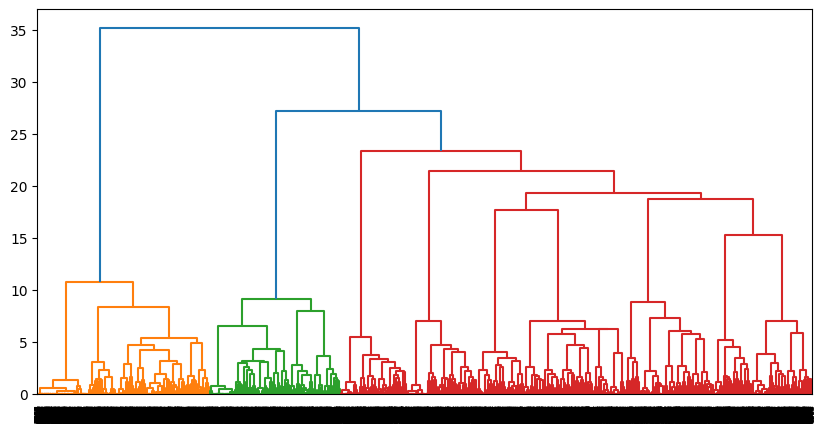

In [216]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(matrix, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

In [218]:
from scipy.cluster.hierarchy import fcluster
labels = fcluster(Z, t=10, criterion='maxclust')

In [257]:
# indices_label_1 = np.where(labels == 1)[0]

In [255]:
for i in range(1,11):
    print(df_10000.iloc[np.where(labels == i)[0]]["queue"].value_counts()*100/sum(df_10000.iloc[np.where(labels == i)[0]]["queue"].value_counts()))
    print()
    print()
    print()

queue
Technical Support                  33.936652
Product Support                    19.004525
Customer Service                   12.368024
IT Support                         11.312217
Returns and Exchanges               7.390649
Billing and Payments                7.390649
Sales and Pre-Sales                 3.770739
General Inquiry                     1.960784
Human Resources                     1.508296
Service Outages and Maintenance     1.357466
Name: count, dtype: float64



queue
Technical Support                  30.314708
Product Support                    18.754014
Customer Service                   14.964676
IT Support                         11.368015
Billing and Payments                8.542068
Returns and Exchanges               4.238921
Human Resources                     3.789338
Service Outages and Maintenance     3.468208
Sales and Pre-Sales                 2.890173
General Inquiry                     1.669878
Name: count, dtype: float64



queue
Technical Support   

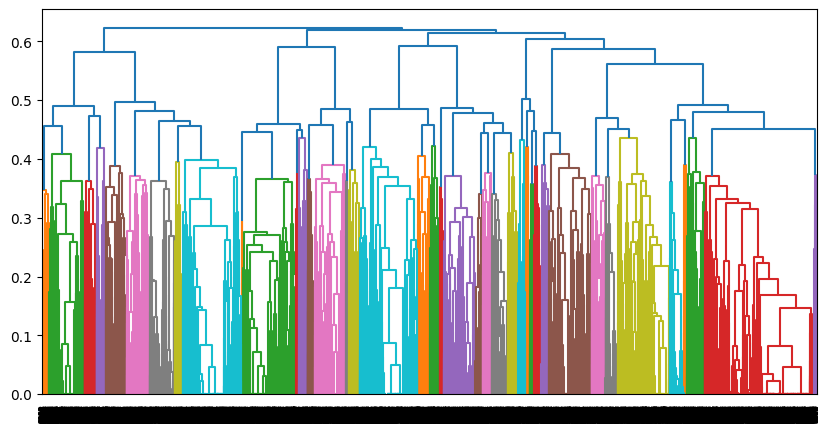

In [259]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(matrix, method='weighted')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

In [260]:
from scipy.cluster.hierarchy import fcluster
labels = fcluster(Z, t=10, criterion='maxclust')

In [261]:
# indices_label_1 = np.where(labels == 1)[0]

In [262]:
for i in range(1,11):
    print(df_10000.iloc[np.where(labels == i)[0]]["queue"].value_counts()*100/sum(df_10000.iloc[np.where(labels == i)[0]]["queue"].value_counts()))
    print()
    print()
    print()

queue
Technical Support                  30.048077
Product Support                    19.471154
IT Support                         14.182692
Customer Service                    9.375000
Billing and Payments                8.653846
Returns and Exchanges               5.769231
Service Outages and Maintenance     4.687500
Sales and Pre-Sales                 3.004808
General Inquiry                     2.644231
Human Resources                     2.163462
Name: count, dtype: float64



queue
Technical Support                  26.975945
Product Support                    20.561283
Customer Service                   17.182131
IT Support                         12.027491
Billing and Payments                6.300115
Returns and Exchanges               6.185567
Sales and Pre-Sales                 3.321879
Service Outages and Maintenance     3.321879
General Inquiry                     2.119129
Human Resources                     2.004582
Name: count, dtype: float64



queue
Product Support     

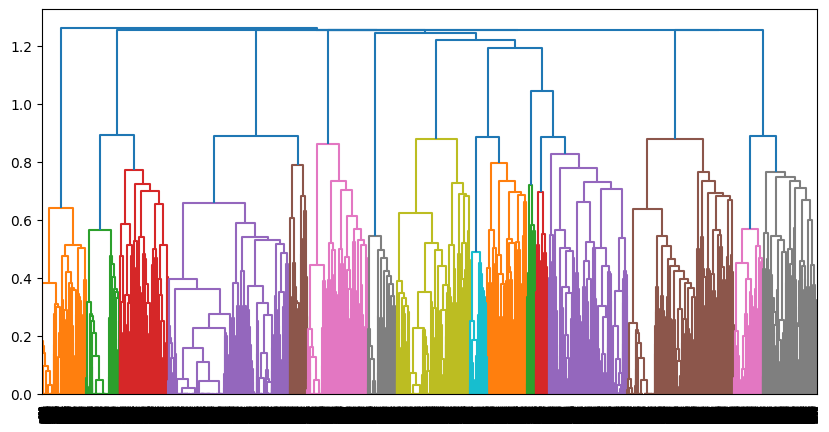

In [263]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

Z = linkage(matrix, method='complete')
plt.figure(figsize=(10, 5))
dendrogram(Z)
plt.show()

In [264]:
from scipy.cluster.hierarchy import fcluster
labels = fcluster(Z, t=10, criterion='maxclust')

In [265]:
# indices_label_1 = np.where(labels == 1)[0]

In [266]:
for i in range(1,11):
    print(df_10000.iloc[np.where(labels == i)[0]]["queue"].value_counts()*100/sum(df_10000.iloc[np.where(labels == i)[0]]["queue"].value_counts()))
    print()
    print()
    print()

queue
Technical Support                  36.777583
IT Support                         16.812609
Service Outages and Maintenance    14.185639
Product Support                    13.660245
Customer Service                    8.581436
Billing and Payments                4.553415
Returns and Exchanges               2.802102
Human Resources                     1.576182
Sales and Pre-Sales                 0.700525
General Inquiry                     0.350263
Name: count, dtype: float64



queue
Technical Support                  33.270677
Product Support                    21.522556
IT Support                         13.063910
Customer Service                   12.875940
Returns and Exchanges               5.545113
Service Outages and Maintenance     5.357143
Billing and Payments                2.913534
Sales and Pre-Sales                 2.725564
General Inquiry                     1.409774
Human Resources                     1.315789
Name: count, dtype: float64



queue
Technical Support   

### Commentaires

Jusqu'ici nous avons essayé d'explorer ce que pouvait apporter l'outil LDA_model().
En utilisant les labels d'origine (sans regroupement), et en choisissant de garder 10 topics, voici les analyses qui en résultent:
- avec les hyperparamètres du modèle LDA (corpus=corpus, id2word=dictionary, num_topics=10, random_state=42, update_every=1, passes=10, alpha='auto'), il semblerait qu'on puisse regrouper les topics (4,6), (3,7,9) et peut-être (8,5)
- plutôt que de prédire les topics auxquels appartiennent chaque "subject", nous avons préféré utiliser les vecteurs formés par les poids de chaque topic dans chaque subject. Une CAH a conduit à constater que les modalités "Technical Support" et "Product Support" sont généralement en tête de classement, quel que soit le groupe analysé. Il n'y a pas d'association exclusive entre un topic et un label.


2 choses auxquelles l'on devrait faire attention:
- il est possible que les subject ne contiennent pas suffisamment de tokens pour ressortir un lien entre les labels et les topics prédits 
- il est possible que l'association entre les subject/body et les queues soient biaisées. En effet, les users peuvent catégoriser leur issue par erreur. Une hypothèse à explorer serait la suivante: les topics latents des réponses données catégorisent suffisamment les subject/body

Nous allons dans nos prochaines analyses regrouper les labels les plus faibles en occurence dans le label "Others" et/ou séparer les labels "Technical Support" et "Product Support" des autres pour un traitement à part entière.

Mais d'abord nous allons voir ce que peut donner les résultats de prédictions directes des topics par le modèle LDA.

## Analyse des prédictions de topics par LDA_model

In [286]:
labels = np.ones(10000)
for i in range(len(corpus)):
    topics = lda_model.get_document_topics(corpus[i], minimum_probability=0.0)
    vector = np.array([val[1] for val in topics])
    label = np.where(vector == np.max(vector))[0][0]
    labels[i] = label

In [287]:
labels

array([8., 1., 7., ..., 8., 3., 7.])

In [293]:
np.unique(labels)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [310]:
index = {}
for i in range(10):
    index[f"""topic_{i+1}"""] = list(np.where(labels == i)[0])

In [295]:
index

{'topic_1': [23,
  43,
  54,
  57,
  66,
  80,
  95,
  134,
  147,
  152,
  153,
  179,
  180,
  194,
  213,
  247,
  248,
  262,
  281,
  310,
  358,
  386,
  399,
  404,
  489,
  507,
  549,
  551,
  573,
  582,
  597,
  616,
  624,
  631,
  637,
  647,
  665,
  685,
  691,
  712,
  715,
  717,
  724,
  726,
  761,
  768,
  770,
  785,
  807,
  815,
  826,
  833,
  843,
  850,
  855,
  881,
  896,
  898,
  907,
  928,
  939,
  940,
  948,
  967,
  971,
  977,
  991,
  992,
  996,
  1062,
  1108,
  1142,
  1172,
  1174,
  1201,
  1216,
  1217,
  1226,
  1231,
  1232,
  1244,
  1246,
  1251,
  1256,
  1272,
  1279,
  1286,
  1324,
  1325,
  1327,
  1357,
  1361,
  1425,
  1442,
  1449,
  1463,
  1482,
  1485,
  1490,
  1517,
  1519,
  1528,
  1548,
  1592,
  1594,
  1616,
  1623,
  1628,
  1662,
  1697,
  1708,
  1711,
  1712,
  1751,
  1822,
  1827,
  1854,
  1870,
  1875,
  1885,
  1897,
  1916,
  1924,
  1944,
  1945,
  1953,
  1965,
  1970,
  1989,
  1998,
  2013,
  2022,
  2041,
 

In [318]:
for i in range(1,11):
    print(df_10000.iloc[index[f"""topic_{i}"""]]["queue"].value_counts()*100/sum(df_10000.iloc[index[f"""topic_{i}"""]]["queue"].value_counts()))
    print()
    print()
    print()

queue
Technical Support                  27.393939
Customer Service                   19.515152
Product Support                    16.969697
IT Support                         12.363636
Billing and Payments               10.666667
Sales and Pre-Sales                 4.484848
Returns and Exchanges               4.363636
Human Resources                     2.060606
Service Outages and Maintenance     1.333333
General Inquiry                     0.848485
Name: count, dtype: float64



queue
Technical Support                  29.360465
Product Support                    16.860465
Customer Service                   16.497093
IT Support                         11.700581
Billing and Payments                9.520349
Service Outages and Maintenance     4.651163
Returns and Exchanges               4.578488
Sales and Pre-Sales                 2.979651
Human Resources                     2.688953
General Inquiry                     1.162791
Name: count, dtype: float64



queue
Technical Support   

### Commentaires

On tire les mêmes analyses que les précédentes.
Essayons de voir ce que donnent les résultat après regroupement des topics proches: (4,6), (3,7,9) et (8,5)

In [320]:
print(df_10000.iloc[index[f"""topic_{4}"""] + index[f"""topic_{6}"""] ]["queue"].value_counts()*100/sum(df_10000.iloc[index[f"""topic_{4}"""] + index[f"""topic_{6}"""] ]["queue"].value_counts()))
print()
print()
print()

queue
Technical Support                  27.767471
Product Support                    20.346320
Customer Service                   16.883117
IT Support                         11.935683
Billing and Payments                6.555349
Returns and Exchanges               5.318491
Service Outages and Maintenance     4.019790
Sales and Pre-Sales                 2.844774
Human Resources                     2.226345
General Inquiry                     2.102659
Name: count, dtype: float64





In [315]:
print(df_10000.iloc[index[f"""topic_{3}"""] + index[f"""topic_{7}"""] + index[f"""topic_{9}"""] ]["queue"].value_counts()*100/sum(df_10000.iloc[index[f"""topic_{3}"""] + index[f"""topic_{7}"""] + index[f"""topic_{9}"""] ]["queue"].value_counts()))
print()
print()
print()

queue
Technical Support                  31.165204
Product Support                    17.358340
IT Support                         13.527534
Billing and Payments               11.971269
Customer Service                   10.055866
Service Outages and Maintenance     7.023144
Returns and Exchanges               4.229848
Sales and Pre-Sales                 1.795690
Human Resources                     1.675978
General Inquiry                     1.197127
Name: count, dtype: float64





In [321]:
print(df_10000.iloc[index[f"""topic_{8}"""] + index[f"""topic_{5}"""] ]["queue"].value_counts()*100/sum(df_10000.iloc[index[f"""topic_{8}"""] + index[f"""topic_{5}"""] ]["queue"].value_counts()))
print()
print()
print()

queue
Technical Support                  24.499141
Product Support                    21.637092
Customer Service                   14.710933
IT Support                         11.161992
Billing and Payments                9.845449
Returns and Exchanges               6.353749
Sales and Pre-Sales                 4.751002
Service Outages and Maintenance     3.777905
Human Resources                     1.659989
General Inquiry                     1.602748
Name: count, dtype: float64





### Commentaires

Il faut dire que les travaux conduits jusqu'ici étaient dans l'espoir de trouver une association exclusive entre les topics et les labels. En ce se basant strictement sur les résultats, la conclusion est qu'il n'y a pas d'association. En d'autres termes, il n'y a pas de cohérence entre les labels et les subjects. Cela pousserait à croire que certains ont été labelisés de façon erronée. Mais attention, car plusieurs autres facteurs peuvent expliquer cette situation:
- la robustesse de la méthode LDA -> en modifiant le nombre de topics, les résultats obtenus peuvent considérablement changer
- la graine utilisée (seed=42) n'a pas été modifiée à plsieurs reprise pour évaluer la robustesse des résultats


<span style="color:red">Les traitements qui seront réalisés par la suite sont les suivants:</span>
- rééquilibrer les données
  * en séparant les labels "Technical support" et "Product support" pour un traitement à part entière du reste
  * en regroupant les labels les plus faibles en effectif
- réaliser des explorations avec l'outil LDA_model sur la variable "body" car elle contient plus de tokens, plus d'info. Le but est de déterminer les topics latents et de créer donc de nous features portant sur ces topics. La recherche des topics va se faire avec Chatgpt en lui demandant de données un intitulé de topic basé sur les 30 tokens les plus fréquents donnés par LDA.
- la même chose sera faite avec la variable "answer"

# Traitement des BODY by Spacy et LDA avec retrait des labels "Technical support" et "Product support"

## Retrait des labels "Technical support" et "Product support" pour un traitement à part entière du reste et prétraitement avec SPACY

In [353]:
df_10000_drop_TS_and_PS = df_10000[(df_10000.queue != "Technical Support") & (df_10000.queue != "Product Support")]
df_10000_drop_TS_and_PS

subject  \
2      Query About Smart Home System Integration Feat...   
3                      Inquiry Regarding Invoice Details   
4      Question About Marketing Agency Software Compa...   
6                                   System Interruptions   
12     Immediate Help Needed: Technical Problem with ...   
...                                                  ...   
19836  Consultation on Safeguarding Medical Data with...   
19838                   Concern about Marketing Strategy   
19839  Promptly Inform User About Onboarding Process ...   
19840                              Security Alert Notice   
19843  Problem with Data Processing in Investment Ana...   

                                                    body  \
2      Dear Customer Support Team,\n\nI hope this mes...   
3      Dear Customer Support Team,\n\nI hope this mes...   
4      Dear Support Team,\n\nI hope this message reac...   
6      Dear Customer Support Team,\n\nI am submitting...   
12     Dear Customer Support Team,\n\nI am submitting...   
...                                                  ...   
19836  Hello Customer Support, I need assistance in s...   
19838  Customer Support, our marketing agency is faci...   
19839  Dear customer support, I am writing to request...   
19840  Encountered a potential security breach impact...   
19843  The data analytics tool is not processing inve...   

                                                  answer      type  \
2      Thank you for your inquiry. Our products suppo...   Request   
3      We appreciate you reaching out with your billi...   Request   
4      Thank you for your inquiry. Our product suppor...   Problem   
6      Thank you for bringing the system disruptions ...  Incident   
12     Thanks for providing detailed information abou...   Problem   
...                                                  ...       ...   
19836  Thank you for your inquiry regarding the secur...   Request   
19838  Hi, we apologize for the issues with the marke...  Incident   
19839  Hello [name], thank you for reaching out regar...    Change   
19840  Dear [Name], acknowledging the security alert ...  Incident   
19843  I will send an acknowledgment email regarding ...   Problem   

                                 queue priority language version     tag_1  \
2                Returns and Exchanges   medium       en      51   Product   
3                 Billing and Payments      low       en      51   Billing   
4                  Sales and Pre-Sales   medium       en      51   Product   
6      Service Outages and Maintenance     high       en      51    Outage   
12                          IT Support   medium       en      51       Bug   
...                                ...      ...      ...     ...       ...   
19836  Service Outages and Maintenance      low       en     400  Security   
19838                 Customer Service   medium       en     400  Feedback   
19839                  General Inquiry      low       en     400  Feedback   
19840                       IT Support   medium       en     400  Security   
19843                 Customer Service   medium       en     400       Bug   

               tag_2          tag_3          tag_4         tag_5   tag_6  \
2            Feature   Tech Support           None          None    None   
3            Payment        Account  Documentation      Feedback    None   
4            Feature       Feedback   Tech Support          None    None   
6         Disruption    Performance             IT  Tech Support    None   
12             Crash        Network    Performance    Disruption  Outage   
...              ...            ...            ...           ...     ...   
19836  Documentation             IT   Tech Support          None    None   
19838          Sales      Marketing    Performance          None    None   
19839        Feature  Documentation       Training          None    None   
19840        Account        Network          Alert      Recovery    N

In [354]:
body_no_treat = df_10000_drop_TS_and_PS.body
body_no_treat

2        Dear Customer Support Team,\n\nI hope this mes...
3        Dear Customer Support Team,\n\nI hope this mes...
4        Dear Support Team,\n\nI hope this message reac...
6        Dear Customer Support Team,\n\nI am submitting...
12       Dear Customer Support Team,\n\nI am submitting...
                               ...                        
19836    Hello Customer Support, I need assistance in s...
19838    Customer Support, our marketing agency is faci...
19839    Dear customer support, I am writing to request...
19840    Encountered a potential security breach impact...
19843    The data analytics tool is not processing inve...
Name: body, Length: 5235, dtype: object

In [355]:
body = [preprocess_spacy(doc) for doc in body_no_treat]

dictionary = corpora.Dictionary(body)
corpus = [dictionary.doc2bow(text) for text in body]

## Exploration avec LDA

In [356]:
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=8,
    random_state=42,
    update_every=1,
    passes=30,
    alpha='auto'
)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.197143  0.131497       1        1  20.459234
1      0.193745 -0.019702       2        1  17.017482
3     -0.121671  0.116922       3        1  14.933621
6      0.088906  0.133352       4        1  10.989124
5      0.239875 -0.038297       5        1  10.557745
4      0.020247 -0.299280       6        1   9.970419
7      0.062810  0.115377       7        1   8.389372
2     -0.286770 -0.139869       8        1   7.683003, topic_info=           Term         Freq        Total Category  logprob  loglift
410    security  1272.000000  1272.000000  Default  30.0000  30.0000
209     digital  1011.000000  1011.000000  Default  29.0000  29.0000
121       issue  2717.000000  2717.000000  Default  28.0000  28.0000
502    strategy  1053.000000  1053.000000  Default  27.0000  27.0000
85    marketing   932.000000   932.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
121       issue   208.663474  2717.583710   Topic8  -4.0766  -0.0006
607        step   131.004499   777.428375   Topic8  -4.5421   0.7854
40   assistance   137.954474  1645.999235   Topic8  -4.4904   0.0870
275     resolve   118.406029  1465.451268   Topic8  -4.6432   0.0504
421        data   109.157121   567.382497   Topic8  -4.7245   0.9179

[561 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
2388      2  0.972832     2.4
754       8  0.838075   20.04
2192      2  0.901221   3.2.1
37        5  0.950433  accept
140       1  0.043782  access
...     ...       ...     ...
202       8  0.022822   write
1461      8  0.931593   xonar
505       3  0.041442   yield
505       4  0.932445   yield
1918      2  0.978634    zoho

[1033 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 4, 7, 6, 5, 8, 3])

In [357]:
# Afficher les 30 mots les plus représentatifs pour chaque topic
topics_8 = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)

# Affichage lisible
for topic_id, word_probs in topics_8:
    print(f"\nTopic {topic_id}:")
    print([word for word, prob in word_probs])



Topic 0:
['issue', 'problem', 'software', 'resolve', 'update', 'datum', 'system', 'investment', 'impact', 'restart', 'cause', 'assistance', 'analytic', 'recent', 'network', 'attempt', 'device', 'persist', 'affect', 'encounter', 'disruption', 'matter', 'face', 'despite', 'integration', 'application', 'support', 'tool', 'report', 'service']

Topic 1:
['investment', 'provide', 'datum', 'tool', 'appreciate', 'analytic', 'integration', 'integrate', 'look', 'assistance', 'information', 'support', 'thank', 'guidance', 'greatly', 'forward', 'project', 'management', 'optimize', 'step', 'customer', 'help', 'seek', 'soon', 'detailed', 'resource', 'hear', 'decision', 'process', 'saas']

Topic 2:
['security', 'system', 'access', 'breach', 'update', 'datum', 'medical', 'software', 'outdated', 'unauthorized', 'incident', 'issue', 'prevent', 'attempt', 'hospital', 'vulnerability', 'protocol', 'potential', 'future', 'healthcare', 'measure', 'assistance', 'step', 'initial', 'detect', 'password', 'firew

In [358]:
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    random_state=42,
    update_every=1,
    passes=30,
    alpha='auto'
)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.133480 -0.000522       1        1  31.129655
0     -0.156852  0.108412       2        1  22.143278
3     -0.149022  0.124936       3        1  19.225378
4     -0.077206 -0.287039       4        1  15.431350
2      0.249600  0.054212       5        1  12.070339, topic_info=           Term         Freq        Total Category  logprob  loglift
410    security  1268.000000  1268.000000  Default  30.0000  30.0000
209     digital  1009.000000  1009.000000  Default  29.0000  29.0000
121       issue  2734.000000  2734.000000  Default  28.0000  28.0000
879     medical  1020.000000  1020.000000  Default  27.0000  27.0000
502    strategy  1057.000000  1057.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
73   appreciate   203.243549  1930.509062   Topic5  -4.5547  -0.1367
33      support   203.564924  1970.604048   Topic5  -4.5531  -0.1557
28      provide   161.620264  2031.005820   Topic5  -4.7838  -0.4166
40   assistance   142.880666  1663.502755   Topic5  -4.9071  -0.3403
27      product   127.537219   716.947617   Topic5  -5.0207   0.3878

[354 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
341       1  0.099096        ability
341       2  0.891863        ability
140       2  0.062339         access
140       3  0.163792         access
140       4  0.773733         access
...     ...       ...            ...
588       2  0.943014        version
588       4  0.050700        version
225       5  0.994060     visibility
981       2  0.950905            vpn
667       4  0.997744  vulnerability

[585 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 5, 3])

In [359]:
# Afficher les 30 mots les plus représentatifs pour chaque topic
topics_5 = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)

# Affichage lisible
for topic_id, word_probs in topics_5:
    print(f"\nTopic {topic_id}:")
    print([word for word, prob in word_probs])



Topic 0:
['issue', 'update', 'software', 'problem', 'datum', 'resolve', 'system', 'investment', 'analytic', 'device', 'network', 'impact', 'cause', 'assistance', 'tool', 'recent', 'attempt', 'affect', 'restart', 'encounter', 'support', 'customer', 'despite', 'integration', 'persist', 'report', 'matter', 'disruption', 'financial', 'face']

Topic 1:
['provide', 'information', 'appreciate', 'support', 'look', 'integration', 'tool', 'customer', 'datum', 'management', 'investment', 'thank', 'project', 'forward', 'analytic', 'detail', 'assistance', 'greatly', 'integrate', 'service', 'detailed', 'available', 'saas', 'interested', 'platform', 'guidance', 'help', 'additionally', 'inquire', 'know']

Topic 2:
['digital', 'marketing', 'strategy', 'brand', 'growth', 'campaign', 'engagement', 'enhance', 'customer', 'agency', 'content', 'audience', 'support', 'appreciate', 'target', 'online', 'improve', 'effort', 'boost', 'provide', 'reach', 'increase', 'assistance', 'presence', 'social', 'result', 

In [360]:
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=4,
    random_state=42,
    update_every=1,
    passes=30,
    alpha='auto'
)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.019080 -0.250990       1        1  38.039946
3      0.144329  0.086757       2        1  24.198101
0      0.132940  0.064155       3        1  21.903450
2     -0.258189  0.100079       4        1  15.858503, topic_info=           Term         Freq        Total Category  logprob  loglift
410    security  1253.000000  1253.000000  Default  30.0000  30.0000
121       issue  2728.000000  2728.000000  Default  29.0000  29.0000
879     medical  1008.000000  1008.000000  Default  28.0000  28.0000
148       datum  2500.000000  2500.000000  Default  27.0000  27.0000
275     resolve  1468.000000  1468.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
90     software   236.163542  1444.378612   Topic4  -4.6775   0.0306
280      update   224.675249  1807.174111   Topic4  -4.7274  -0.2434
33      support   212.340312  1969.916656   Topic4  -4.7838  -0.3861
7      customer   204.199538  1807.623268   Topic4  -4.8229  -0.3392
40   assistance   181.633697  1661.012037   Topic4  -4.9400  -0.3717

[302 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
341       1  0.091852        ability
341       2  0.119408        ability
341       3  0.789930        ability
140       2  0.217769         access
140       3  0.028298         access
...     ...       ...            ...
225       1  0.988346     visibility
667       4  0.996270  vulnerability
442       1  0.995757           well
505       2  0.038518          yield
505       3  0.943691          yield

[451 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 3])

In [361]:
# Afficher les 30 mots les plus représentatifs pour chaque topic
topics_4 = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)

# Affichage lisible
for topic_id, word_probs in topics_4:
    print(f"\nTopic {topic_id}:")
    print([word for word, prob in word_probs])



Topic 0:
['issue', 'update', 'software', 'datum', 'problem', 'investment', 'analytic', 'resolve', 'system', 'marketing', 'campaign', 'cause', 'recent', 'tool', 'digital', 'customer', 'assistance', 'despite', 'effort', 'device', 'support', 'impact', 'attempt', 'agency', 'performance', 'result', 'integration', 'optimization', 'affect', 'financial']

Topic 1:
['provide', 'appreciate', 'information', 'support', 'customer', 'strategy', 'look', 'tool', 'integration', 'forward', 'digital', 'assistance', 'detail', 'enhance', 'management', 'thank', 'investment', 'datum', 'project', 'brand', 'greatly', 'analytic', 'service', 'integrate', 'detailed', 'marketing', 'reach', 'help', 'interested', 'available']

Topic 2:
['security', 'datum', 'medical', 'system', 'access', 'information', 'hospital', 'measure', 'breach', 'secure', 'sensitive', 'patient', 'ensure', 'protocol', 'healthcare', 'provide', 'unauthorized', 'implement', 'software', 'protect', 'update', 'integrity', 'prevent', 'outdated', 'sup

In [362]:
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=3,
    random_state=42,
    update_every=1,
    passes=30,
    alpha='auto'
)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.182414  0.113727       1        1  41.304887
0      0.027418 -0.188025       2        1  40.304520
2     -0.209832  0.074298       3        1  18.390593, topic_info=           Term         Freq        Total Category  logprob  loglift
410    security  1254.000000  1254.000000  Default  30.0000  30.0000
121       issue  2729.000000  2729.000000  Default  29.0000  29.0000
879     medical  1009.000000  1009.000000  Default  28.0000  28.0000
130     problem  1400.000000  1400.000000  Default  27.0000  27.0000
148       datum  2485.000000  2485.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
40   assistance   227.509417  1665.741129   Topic3  -4.8630  -0.2975
33      support   229.069048  1977.895241   Topic3  -4.8561  -0.4624
698    guidance   203.448734   818.472009   Topic3  -4.9747   0.3013
7      customer   219.861026  1811.395347   Topic3  -4.8972  -0.4155
73   appreciate   200.187633  1949.715998   Topic3  -4.9909  -0.5829

[217 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
140       2  0.241296         access
140       3  0.758183         access
68        1  0.843839   additionally
68        3  0.155494   additionally
227       2  0.997609         affect
...     ...       ...            ...
225       1  0.989012     visibility
225       3  0.009158     visibility
667       3  0.995881  vulnerability
442       1  0.991026           well
442       3  0.007712           well

[282 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [363]:
# Afficher les 30 mots les plus représentatifs pour chaque topic
topics_3 = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)

# Affichage lisible
for topic_id, word_probs in topics_3:
    print(f"\nTopic {topic_id}:")
    print([word for word, prob in word_probs])



Topic 0:
['issue', 'resolve', 'problem', 'update', 'software', 'system', 'recent', 'cause', 'matter', 'restart', 'assistance', 'datum', 'support', 'attempt', 'server', 'impact', 'appreciate', 'customer', 'persist', 'encounter', 'investment', 'service', 'face', 'analytic', 'affect', 'platform', 'billing', 'integration', 'report', 'despite']

Topic 1:
['provide', 'appreciate', 'support', 'information', 'strategy', 'customer', 'look', 'tool', 'digital', 'integration', 'brand', 'investment', 'datum', 'assistance', 'forward', 'enhance', 'detail', 'analytic', 'marketing', 'management', 'thank', 'greatly', 'project', 'service', 'integrate', 'reach', 'detailed', 'help', 'interested', 'platform']

Topic 2:
['security', 'datum', 'medical', 'system', 'access', 'information', 'hospital', 'measure', 'breach', 'secure', 'sensitive', 'patient', 'ensure', 'protocol', 'healthcare', 'provide', 'update', 'implement', 'unauthorized', 'outdated', 'software', 'protect', 'support', 'assistance', 'prevent', 

## Commentaires

Après une analyse des tokens par configuration du LDA et par topics:
- 8 Topics
    * Problèmes logiciels, pannes système et tentatives de résolution
    * Support analytique et décisionnel pour projets SaaS ou clients
    * Incidents de sécurité, failles système et prévention des risques
    * Bugs serveurs, erreurs de facturation et résolution technique
    * Protection des données médicales et conformité en santé
    * Informations sur les services, facturation et options disponibles
    * Stratégie digitale et campagnes marketing orientées client
    * Amélioration produit, retours utilisateurs et gestion de projet
- 5 Topics
    * Problèmes logiciels, perturbations réseau et impact sur opérations
    * Informations clients, outils SaaS et support personnalisé
    * Marketing digital et stratégie de croissance orientée client
    * Pannes serveurs, erreurs de facturation et support technique
    * Sécurité des données médicales et conformité hospitalière
- 4 Topics
    * Problèmes logiciels et optimisation des performances marketing
    * Support client, outils digitaux et stratégie de marque
    * Sécurité des données médicales et protection des systèmes
    * Incidents techniques, erreurs serveurs et demandes d’assistance
- 3 Topics
    * Problèmes techniques et assistance liés aux logiciels et systèmes
    * Support client, stratégie digitale et intégration des outils
    * Sécurité des données médicales et protocoles de protection

# Traitement des ANSWER by Spacy et LDA avec retrait des labels "Technical support" et "Product support"

## Retrait des labels "Technical support" et "Product support" pour un traitement à part entière du reste et prétraitement avec SPACY

In [353]:
df_10000_drop_TS_and_PS = df_10000[(df_10000.queue != "Technical Support") & (df_10000.queue != "Product Support")]
df_10000_drop_TS_and_PS

subject  \
2      Query About Smart Home System Integration Feat...   
3                      Inquiry Regarding Invoice Details   
4      Question About Marketing Agency Software Compa...   
6                                   System Interruptions   
12     Immediate Help Needed: Technical Problem with ...   
...                                                  ...   
19836  Consultation on Safeguarding Medical Data with...   
19838                   Concern about Marketing Strategy   
19839  Promptly Inform User About Onboarding Process ...   
19840                              Security Alert Notice   
19843  Problem with Data Processing in Investment Ana...   

                                                    body  \
2      Dear Customer Support Team,\n\nI hope this mes...   
3      Dear Customer Support Team,\n\nI hope this mes...   
4      Dear Support Team,\n\nI hope this message reac...   
6      Dear Customer Support Team,\n\nI am submitting...   
12     Dear Customer Support Team,\n\nI am submitting...   
...                                                  ...   
19836  Hello Customer Support, I need assistance in s...   
19838  Customer Support, our marketing agency is faci...   
19839  Dear customer support, I am writing to request...   
19840  Encountered a potential security breach impact...   
19843  The data analytics tool is not processing inve...   

                                                  answer      type  \
2      Thank you for your inquiry. Our products suppo...   Request   
3      We appreciate you reaching out with your billi...   Request   
4      Thank you for your inquiry. Our product suppor...   Problem   
6      Thank you for bringing the system disruptions ...  Incident   
12     Thanks for providing detailed information abou...   Problem   
...                                                  ...       ...   
19836  Thank you for your inquiry regarding the secur...   Request   
19838  Hi, we apologize for the issues with the marke...  Incident   
19839  Hello [name], thank you for reaching out regar...    Change   
19840  Dear [Name], acknowledging the security alert ...  Incident   
19843  I will send an acknowledgment email regarding ...   Problem   

                                 queue priority language version     tag_1  \
2                Returns and Exchanges   medium       en      51   Product   
3                 Billing and Payments      low       en      51   Billing   
4                  Sales and Pre-Sales   medium       en      51   Product   
6      Service Outages and Maintenance     high       en      51    Outage   
12                          IT Support   medium       en      51       Bug   
...                                ...      ...      ...     ...       ...   
19836  Service Outages and Maintenance      low       en     400  Security   
19838                 Customer Service   medium       en     400  Feedback   
19839                  General Inquiry      low       en     400  Feedback   
19840                       IT Support   medium       en     400  Security   
19843                 Customer Service   medium       en     400       Bug   

               tag_2          tag_3          tag_4         tag_5   tag_6  \
2            Feature   Tech Support           None          None    None   
3            Payment        Account  Documentation      Feedback    None   
4            Feature       Feedback   Tech Support          None    None   
6         Disruption    Performance             IT  Tech Support    None   
12             Crash        Network    Performance    Disruption  Outage   
...              ...            ...            ...           ...     ...   
19836  Documentation             IT   Tech Support          None    None   
19838          Sales      Marketing    Performance          None    None   
19839        Feature  Documentation       Training          None    None   
19840        Account        Network          Alert      Recovery    N

In [364]:
answer_no_treat = df_10000_drop_TS_and_PS.answer
answer_no_treat

2        Thank you for your inquiry. Our products suppo...
3        We appreciate you reaching out with your billi...
4        Thank you for your inquiry. Our product suppor...
6        Thank you for bringing the system disruptions ...
12       Thanks for providing detailed information abou...
                               ...                        
19836    Thank you for your inquiry regarding the secur...
19838    Hi, we apologize for the issues with the marke...
19839    Hello [name], thank you for reaching out regar...
19840    Dear [Name], acknowledging the security alert ...
19843    I will send an acknowledgment email regarding ...
Name: answer, Length: 5235, dtype: object

In [365]:
answer = [preprocess_spacy(doc) for doc in answer_no_treat]

dictionary = corpora.Dictionary(answer)
corpus = [dictionary.doc2bow(text) for text in answer]

## Exploration avec LDA

In [366]:
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=8,
    random_state=42,
    update_every=1,
    passes=30,
    alpha='auto'
)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.142639  0.032518       1        1  27.776222
5      0.069318  0.087175       2        1  13.618536
0      0.142430  0.103222       3        1  12.319525
3      0.157380  0.086134       4        1  12.057754
7     -0.048892 -0.175670       5        1  10.166449
2      0.148080 -0.235508       6        1  10.120567
1     -0.271987 -0.009649       7        1   7.126915
4     -0.053691  0.111777       8        1   6.814034, topic_info=           Term         Freq        Total Category  logprob  loglift
107       issue  2871.000000  2871.000000  Default  30.0000  30.0000
347    security  1208.000000  1208.000000  Default  29.0000  29.0000
191     digital   878.000000   878.000000  Default  28.0000  28.0000
213       datum  1915.000000  1915.000000  Default  27.0000  27.0000
128     contact  1475.000000  1475.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
121  understand   100.634230  1034.430481   Topic8  -4.6331   0.3561
33     specific    93.631950  1317.324286   Topic8  -4.7053   0.0422
76     analytic    81.096080   899.710050   Topic8  -4.8490   0.2797
144        team    80.144358   786.614903   Topic8  -4.8608   0.4023
134        need    79.282839  1123.237043   Topic8  -4.8716   0.0352

[588 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
2168      7  0.952561          123
1330      6  0.965317          19c
2020      7  0.887640          360
2169      7  0.952561         4567
2199      8  0.884221         7.13
...     ...       ...          ...
462       6  0.005692         well
462       8  0.072104         well
1688      5  0.938771         wifi
1591      2  0.963517  woocommerce
1521      2  0.977563         zoho

[1107 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 6, 1, 4, 8, 3, 2, 5])

In [367]:
# Afficher les 30 mots les plus représentatifs pour chaque topic
topics_8 = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)

# Affichage lisible
for topic_id, word_probs in topics_8:
    print(f"\nTopic {topic_id}:")
    print([word for word, prob in word_probs])



Topic 0:
['digital', 'strategy', 'marketing', 'provide', 'discuss', 'brand', 'campaign', 'growth', 'information', 'detail', 'happy', 'current', 'well', 'engagement', 'understand', 'time', 'know', 'schedule', 'let', 'assist', 'help', 'tel_num', 'specific', 'service', 'thank', 'social', 'medium', 'convenient', 'target', 'reach']

Topic 1:
['issue', 'contact', 'tel_num', 'investigate', 'discuss', 'resolve', 'server', 'provide', 'review', 'cause', 'team', 'assistance', 'step', 'service', 'soon', 'outage', 'resolution', 'possible', 'solution', 'update', 'system', 'detail', 'affect', 'problem', 'saas', 'disruption', 'appreciate', 'platform', 'root', 'receive']

Topic 2:
['datum', 'security', 'medical', 'information', 'access', 'secure', 'provide', 'encryption', 'ensure', 'control', 'hospital', 'sensitive', 'discuss', 'implement', 'include', 'solution', 'system', 'measure', 'compliance', 'detailed', 'thank', 'protect', 'patient', 'protocol', 'integrity', 'confidentiality', 'happy', 'guidance

In [368]:
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    random_state=42,
    update_every=1,
    passes=30,
    alpha='auto'
)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.020765 -0.168947       1        1  36.466379
0     -0.010749 -0.073917       2        1  19.607093
4      0.025843 -0.009980       3        1  18.830111
2     -0.195190  0.138445       4        1  16.168871
3      0.200861  0.114399       5        1   8.927546, topic_info=         Term         Freq        Total Category  logprob  loglift
107     issue  2888.000000  2888.000000  Default  30.0000  30.0000
347  security  1195.000000  1195.000000  Default  29.0000  29.0000
47    billing   637.000000   637.000000  Default  28.0000  28.0000
330  strategy   889.000000   889.000000  Default  27.0000  27.0000
707   medical   771.000000   771.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
11    feature   104.329841   429.250831   Topic5  -4.8672   1.0015
226   tel_num   138.242638  2064.947155   Topic5  -4.5858  -0.2878
71    service   117.152336   977.914593   Topic5  -4.7513   0.2941
82      email   116.013774   967.926367   Topic5  -4.7611   0.2946
140      saas   105.052230   550.604975   Topic5  -4.8603   0.7595

[351 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
613       1  0.419481   acc_num
613       2  0.053424   acc_num
613       3  0.134551   acc_num
613       4  0.033638   acc_num
613       5  0.360121   acc_num
...     ...       ...       ...
122       1  0.150525  workflow
122       3  0.845809  workflow
1357      1  0.984233     write
1334      3  0.968738    zapier
1521      3  0.983404      zoho

[563 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 5, 3, 4])

In [369]:
# Afficher les 30 mots les plus représentatifs pour chaque topic
topics_5 = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)

# Affichage lisible
for topic_id, word_probs in topics_5:
    print(f"\nTopic {topic_id}:")
    print([word for word, prob in word_probs])



Topic 0:
['provide', 'strategy', 'digital', 'discuss', 'marketing', 'investment', 'information', 'brand', 'happy', 'analytic', 'detail', 'service', 'datum', 'campaign', 'tool', 'time', 'current', 'growth', 'well', 'help', 'thank', 'specific', 'let', 'know', 'schedule', 'tel_num', 'understand', 'offer', 'solution', 'assist']

Topic 1:
['issue', 'provide', 'detail', 'discuss', 'error', 'assist', 'resolve', 'tel_num', 'time', 'investigate', 'message', 'schedule', 'contact', 'step', 'understand', 'update', 'know', 'well', 'problem', 'system', 'receive', 'like', 'matter', 'cause', 'software', 'let', 'email', 'specific', 'recent', 'affect']

Topic 2:
['security', 'datum', 'medical', 'provide', 'access', 'information', 'system', 'discuss', 'secure', 'hospital', 'measure', 'ensure', 'encryption', 'breach', 'control', 'implement', 'include', 'tel_num', 'protocol', 'sensitive', 'incident', 'patient', 'solution', 'thank', 'detailed', 'time', 'let', 'healthcare', 'protect', 'compliance']

Topic 3

In [370]:
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=4,
    random_state=42,
    update_every=1,
    passes=30,
    alpha='auto'
)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.016033  0.193348       1        1  38.236220
0      0.017905  0.004432       2        1  33.070421
2     -0.201200 -0.081153       3        1  17.557051
3      0.167262 -0.116627       4        1  11.136308, topic_info=          Term         Freq        Total Category  logprob  loglift
107      issue  2890.000000  2890.000000  Default  30.0000  30.0000
347   security  1203.000000  1203.000000  Default  29.0000  29.0000
213      datum  1921.000000  1921.000000  Default  28.0000  28.0000
47     billing   644.000000   644.000000  Default  27.0000  27.0000
707    medical   776.000000   776.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
248  available   165.868454   724.925168   Topic4  -4.6247   0.7201
534      happy   182.681086  1083.589737   Topic4  -4.5281   0.4147
134       need   178.785547  1120.971336   Topic4  -4.5497   0.3592
226    tel_num   205.598560  2059.484235   Topic4  -4.4099  -0.1093
82       email   166.937381   969.381313   Topic4  -4.6182   0.4359

[277 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
613       1  0.408877        acc_num
613       2  0.100738        acc_num
613       3  0.045431        acc_num
613       4  0.444431        acc_num
41        4  0.982160         accept
...     ...       ...            ...
1317      3  0.989856  vulnerability
462       1  0.603295           well
462       2  0.382806           well
462       3  0.013136           well
1357      1  0.983522          write

[417 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3, 4])

In [371]:
# Afficher les 30 mots les plus représentatifs pour chaque topic
topics_4 = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)

# Affichage lisible
for topic_id, word_probs in topics_4:
    print(f"\nTopic {topic_id}:")
    print([word for word, prob in word_probs])



Topic 0:
['provide', 'discuss', 'strategy', 'digital', 'information', 'detail', 'happy', 'tool', 'thank', 'integration', 'analytic', 'marketing', 'tel_num', 'time', 'investment', 'specific', 'datum', 'current', 'let', 'know', 'schedule', 'need', 'service', 'brand', 'help', 'assist', 'support', 'offer', 'reach', 'well']

Topic 1:
['issue', 'provide', 'detail', 'discuss', 'error', 'assist', 'tel_num', 'resolve', 'time', 'investigate', 'message', 'schedule', 'contact', 'update', 'step', 'understand', 'know', 'well', 'system', 'problem', 'receive', 'like', 'matter', 'software', 'cause', 'let', 'specific', 'email', 'recent', 'affect']

Topic 2:
['security', 'datum', 'medical', 'provide', 'access', 'information', 'discuss', 'system', 'secure', 'ensure', 'hospital', 'measure', 'encryption', 'breach', 'control', 'tel_num', 'implement', 'include', 'protocol', 'detailed', 'sensitive', 'thank', 'incident', 'patient', 'time', 'solution', 'let', 'guidance', 'detail', 'recommend']

Topic 3:
['billi

In [372]:
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=3,
    random_state=42,
    update_every=1,
    passes=30,
    alpha='auto'
)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.142510  0.102285       1        1  41.999401
0      0.042363 -0.147363       2        1  40.382846
2     -0.184873  0.045078       3        1  17.617752, topic_info=         Term         Freq        Total Category  logprob  loglift
107     issue  2880.000000  2880.000000  Default  30.0000  30.0000
347  security  1191.000000  1191.000000  Default  29.0000  29.0000
213     datum  1915.000000  1915.000000  Default  28.0000  28.0000
707   medical   768.000000   768.000000  Default  27.0000  27.0000
230    access   705.000000   705.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
120      time   211.991585  1866.255542   Topic3  -4.8380  -0.4389
23        let   201.913596  1364.240941   Topic3  -4.8867  -0.1743
177  solution   191.966547  1113.795375   Topic3  -4.9372  -0.0219
8      detail   197.303203  2589.906211   Topic3  -4.9098  -0.8384
225  schedule   179.771858  1426.381321   Topic3  -5.0029  -0.3349

[222 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
230       1  0.224054         access
230       3  0.775681         access
123       1  0.796902        account
123       2  0.175565        account
123       3  0.028804        account
...     ...       ...            ...
38        3  0.121542         update
1317      3  0.988056  vulnerability
462       1  0.607187           well
462       2  0.370122           well
462       3  0.022488           well

[295 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 3])

In [373]:
# Afficher les 30 mots les plus représentatifs pour chaque topic
topics_3 = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)

# Affichage lisible
for topic_id, word_probs in topics_3:
    print(f"\nTopic {topic_id}:")
    print([word for word, prob in word_probs])



Topic 0:
['provide', 'discuss', 'information', 'strategy', 'detail', 'happy', 'thank', 'integration', 'digital', 'tel_num', 'tool', 'time', 'analytic', 'specific', 'let', 'marketing', 'offer', 'investment', 'need', 'datum', 'know', 'service', 'current', 'detailed', 'management', 'schedule', 'support', 'include', 'assist', 'brand']

Topic 1:
['issue', 'provide', 'detail', 'discuss', 'assist', 'tel_num', 'error', 'time', 'resolve', 'investigate', 'contact', 'message', 'update', 'schedule', 'step', 'understand', 'know', 'well', 'receive', 'problem', 'system', 'like', 'matter', 'account', 'information', 'software', 'let', 'specific', 'cause', 'email']

Topic 2:
['security', 'datum', 'medical', 'provide', 'access', 'information', 'discuss', 'system', 'secure', 'hospital', 'ensure', 'measure', 'encryption', 'breach', 'control', 'tel_num', 'implement', 'include', 'protocol', 'sensitive', 'time', 'thank', 'incident', 'detailed', 'let', 'patient', 'detail', 'solution', 'guidance', 'schedule']


## Commentaires

Après une analyse des tokens par configuration du LDA et par topics:
- 8 Topics
    * Stratégie marketing digitale et planification de campagnes ciblées
    * Pannes serveurs, enquêtes techniques et résolution rapide
    * Sécurité des données médicales et conformité hospitalière
    * Outils analytiques, services personnalisés et conseils d’investissement
    * Demandes d’amélioration logicielle et gestion de projet produit
    * Intégration SaaS, facturation et accompagnement client
    * Problèmes techniques, erreurs systèmes et assistance personnalisée
    * Incidents de sécurité, accès non autorisés et réponse adaptée
- 5 Topics
    * Stratégie digitale, campagnes marketing et accompagnement personnalisé
    * Problèmes techniques, assistance client et résolution d’erreurs
    * Sécurité des données médicales et conformité des systèmes
    * Facturation, abonnements SaaS et gestion des paiements clients
    * Intégration de solutions SaaS et gestion de projets
- 4 Topics
    * Stratégie digitale, intégration d’outils et communication client
    * Résolution de problèmes techniques et assistance logicielle
    * Sécurité des données médicales et conformité des systèmes
    * Facturation, abonnements SaaS et gestion des comptes clients
- 3 Topics
    * Stratégie digitale, marketing, intégration, gestion, communication client
    * Assistance technique, résolution de problèmes, support, investigation, mise à jour
    * Sécurité des données médicales, protection, conformité, accès sécurisé, protocole


<span style="color:red">Il y a une correspondance globale entre les topics des documents ANWER et ceux des documents BODY, surtout pour la catégorie des 8 Topics </span>

# Traitement des BODY by Spacy et LDA sur les labels "Technical support" et "Product support"

## Extraction des labels "Technical support" et "Product support" pour un traitement à part entière du reste et prétraitement avec SPACY

In [375]:
df_10000_drop_TS_and_PS = df_10000[(df_10000.queue == "Technical Support") | (df_10000.queue == "Product Support")]
df_10000_drop_TS_and_PS

subject  \
1                                     Account Disruption   
5                                          Feature Query   
7      Connectivity Problems with Printer on MacBook Pro   
10                                      VPN Access Issue   
13     Inquiry for Detailed Information on Agency Off...   
...                                                  ...   
19828                         Zapier Integration Problem   
19832                               Concern About System   
19834                             Delayed Response Times   
19842                    Problem with Network Connection   
19845            Concern About Online Engagement Decline   

                                                    body  \
1      Dear Customer Support Team,\n\nI am writing to...   
5      Dear Customer Support,\n\nI hope this message ...   
7      Dear Support Team,\n\nI am reporting a recurri...   
10     Customer Support,\n\nWe are encountering a dis...   
13     Dear Customer Support Team,\n\nI hope this mes...   
...                                                  ...   
19828  A financial firm is encountering integration d...   
19832  There has been a system outage impacting the d...   
19834  A marketing agency is encountering delays in r...   
19842  The devices are unable to connect to the WLAN-...   
19845  Noticing a substantial decrease in online enga...   

                                                  answer      type  \
1      Thank you for reaching out, <name>. We are awa...  Incident   
5      Thank you for your inquiry. Please specify whi...   Request   
7      Thank you for reaching out regarding the conne...  Incident   
10     Thank you for reporting this problem. Please p...  Incident   
13     Thank you for your interest in our agency's se...   Request   
...                                                  ...       ...   
19828  I apologize for the Zapier Sage Accounting int...  Incident   
19832  We acknowledge your concern regarding the syst...  Incident   
19834  We are reaching out to address the issue of de...  Incident   
19842  To address the network connection issue, furth...  Incident   
19845  Acknowledging the issue with online engagement...  Incident   

                   queue priority language version        tag_1        tag_2  \
1      Technical Support     high       en      51      Account   Disruption   
5      Technical Support     high       en      51      Feature      Product   
7      Technical Support   medium       en      51      Network     Hardware   
10       Product Support   medium       en      51      Network   Disruption   
13       Product Support     high       en      51      Product      Service   
...                  ...      ...      ...     ...          ...          ...   
19828    Product Support   medium       en     400          Bug  Integration   
19832    Product Support   medium       en     400       Outage   Disruption   
19834  Technical Support      low       en     400  Performance       Outage   
19842  Technical Support   medium       en     400      Network  Performance   
19845    Product Support     high       en     400  Performance     Feedback   

               tag_3         tag_4          tag_5         tag_6 tag_7 tag_8  
1             Outage            IT   Tech Support          None  None  None  
5      Documentation      Feedback           None          None  None  None  
7        Performance           Bug  Compatibility          None  None  None  
10               VPN  Tech Support           None          None  None  None  
13          Feedback         Sales           None          None  None  None  
...              ...           ...            ...           ...   ...   ...  
19828    Performance       Account             IT  Tech Support  None  None  
19832    Performance            IT   Tech Support          None  None  None  
19834        Network            IT   Tech Support          None  None  None  
19842     Disruption     

In [376]:
body_no_treat = df_10000_drop_TS_and_PS.body
body_no_treat

1        Dear Customer Support Team,\n\nI am writing to...
5        Dear Customer Support,\n\nI hope this message ...
7        Dear Support Team,\n\nI am reporting a recurri...
10       Customer Support,\n\nWe are encountering a dis...
13       Dear Customer Support Team,\n\nI hope this mes...
                               ...                        
19828    A financial firm is encountering integration d...
19832    There has been a system outage impacting the d...
19834    A marketing agency is encountering delays in r...
19842    The devices are unable to connect to the WLAN-...
19845    Noticing a substantial decrease in online enga...
Name: body, Length: 4765, dtype: object

In [377]:
body = [preprocess_spacy(doc) for doc in body_no_treat]

dictionary = corpora.Dictionary(body)
corpus = [dictionary.doc2bow(text) for text in body]

## Exploration avec LDA

In [378]:
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=8,
    random_state=42,
    update_every=1,
    passes=30,
    alpha='auto'
)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.103267  0.073228       1        1  21.503002
4      0.194124  0.062222       2        1  21.217068
7      0.093973  0.193818       3        1  18.720520
6     -0.237370  0.003896       4        1  10.286395
1     -0.196678 -0.071426       5        1   9.622317
5     -0.229096 -0.049076       6        1   8.919145
2      0.050436  0.088639       7        1   6.515065
0      0.221345 -0.301301       8        1   3.216487, topic_info=              Term         Freq        Total Category  logprob  loglift
376       security  1390.000000  1390.000000  Default  30.0000  30.0000
26         problem  1913.000000  1913.000000  Default  29.0000  29.0000
16           issue  3629.000000  3629.000000  Default  28.0000  28.0000
11          device   690.000000   690.000000  Default  27.0000  27.0000
558        medical  1000.000000  1000.000000  Default  26.0000  26.0000
..             ...          ...          ...      ...      ...      ...
34         support    51.476760  1591.246561   Topic8  -4.5257   0.0057
9         customer    42.223678  1386.495879   Topic8  -4.7238  -0.0547
383          cloud    30.458637    93.187631   Topic8  -5.0504   2.3186
294        persist    35.224435   805.188234   Topic8  -4.9051   0.3075
85   configuration    31.212813   373.270950   Topic8  -5.0260   0.9554

[555 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1596      4  0.979553       19c
1597      3  0.035448       4.4
1597      4  0.815297       4.4
1597      5  0.106343       4.4
1696      5  0.984064       6.2
...     ...       ...       ...
2175      5  0.944658   wolfram
225       1  0.160920  workflow
225       2  0.115443  workflow
225       5  0.720642  workflow
1611      7  0.966878     yield

[1019 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 5, 8, 7, 2, 6, 3, 1])

In [379]:
# Afficher les 30 mots les plus représentatifs pour chaque topic
topics_8 = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)

# Affichage lisible
for topic_id, word_probs in topics_8:
    print(f"\nTopic {topic_id}:")
    print([word for word, prob in word_probs])



Topic 0:
['device', 'network', 'connectivity', 'problem', 'dear', 'team,\\n\\ni', 'issue', 'setting', 'router', 'connection', 'smart', 'face', 'firmware', 'check', 'switch', 'reach', 'restart', 'support', 'affect', 'audio', 'meeting', 'internet', 'customer', 'significantly', 'connect', 'drop', 'persist', 'instability', 'configuration', 'day']

Topic 1:
['integration', 'project', 'management', 'integrate', 'saas', 'platform', 'step', 'support', 'provide', 'request', 'workflow', 'team', 'feature', 'customer', 'process', 'enhance', 'documentation', 'comprehensive', 'appreciate', 'instruction', 'detailed', 'greatly', 'detail', 'guidance', 'capability', 'improve', 'api', 'tool', 'dear', 'information']

Topic 2:
['campaign', 'marketing', 'digital', 'agency', 'issue', 'engagement', 'strategy', 'recent', 'result', 'assistance', 'metric', 'adjust', 'improvement', 'despite', 'effort', 'algorithm', 'targeting', 'need', 'target', 'platform', 'cause', 'performance', 'content', 'update', 'review', 

In [380]:
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    random_state=42,
    update_every=1,
    passes=30,
    alpha='auto'
)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.012353 -0.078108       1        1  33.498275
1     -0.279709 -0.109934       2        1  25.023509
2     -0.028373  0.277734       3        1  17.892123
4      0.096427  0.029335       4        1  17.243498
0      0.224007 -0.119027       5        1   6.342594, topic_info=          Term         Freq        Total Category  logprob  loglift
16       issue  3509.000000  3509.000000  Default  30.0000  30.0000
376   security  1348.000000  1348.000000  Default  29.0000  29.0000
26     problem  1933.000000  1933.000000  Default  28.0000  28.0000
558    medical   970.000000   970.000000  Default  27.0000  27.0000
11      device   685.000000   685.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
105     system    74.929652  1939.426952   Topic5  -4.8292  -0.4957
4      attempt    59.241046  1033.466877   Topic5  -5.0642  -0.1012
152       help    56.750379   625.738016   Topic5  -5.1071   0.3576
88   encounter    55.405448   671.555296   Topic5  -5.1311   0.2630
135       step    54.045312   887.848401   Topic5  -5.1560  -0.0411

[374 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
1596      5  0.963593       19c
0         1  0.073163    access
0         3  0.841934    access
0         4  0.057405    access
0         5  0.027014    access
...     ...       ...       ...
433       5  0.932655      wifi
570       5  0.899132  wireless
1951      5  0.918390      wlan
1291      1  0.084592   worried
1291      4  0.902312   worried

[614 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 5, 1])

In [381]:
# Afficher les 30 mots les plus représentatifs pour chaque topic
topics_5 = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)

# Affichage lisible
for topic_id, word_probs in topics_5:
    print(f"\nTopic {topic_id}:")
    print([word for word, prob in word_probs])



Topic 0:
['issue', 'device', 'problem', 'network', 'update', 'software', 'face', 'restart', 'connectivity', 'connection', 'check', 'resolve', 'persist', 'recent', 'application', 'project', 'setting', 'compatibility', 'system', 'router', 'management', 'configuration', 'driver', 'try', 'attempt', 'help', 'encounter', 'reboot', 'step', 'sync']

Topic 1:
['provide', 'support', 'appreciate', 'integration', 'customer', 'information', 'strategy', 'tool', 'look', 'datum', 'guidance', 'integrate', 'investment', 'analytic', 'project', 'management', 'greatly', 'forward', 'assistance', 'enhance', 'brand', 'platform', 'detailed', 'thank', 'seek', 'digital', 'request', 'reach', 'improve', 'optimize']

Topic 2:
['security', 'datum', 'medical', 'system', 'access', 'breach', 'hospital', 'update', 'information', 'measure', 'patient', 'software', 'sensitive', 'unauthorized', 'ensure', 'outdated', 'healthcare', 'issue', 'protocol', 'secure', 'prevent', 'implement', 'attempt', 'assistance', 'firewall', 'i

In [382]:
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=4,
    random_state=42,
    update_every=1,
    passes=30,
    alpha='auto'
)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.001933  0.065385       1        1  43.307084
1     -0.272735 -0.019689       2        1  25.958601
2      0.134758 -0.223172       3        1  19.681685
0      0.139910  0.177476       4        1  11.052630, topic_info=         Term         Freq        Total Category  logprob  loglift
376  security  1379.000000  1379.000000  Default  30.0000  30.0000
558   medical   993.000000   993.000000  Default  29.0000  29.0000
16      issue  3587.000000  3587.000000  Default  28.0000  28.0000
26    problem  1868.000000  1868.000000  Default  27.0000  27.0000
11     device   720.000000   720.000000  Default  26.0000  26.0000
..        ...          ...          ...      ...      ...      ...
132   resolve   153.023673  1891.886940   Topic4  -4.6706  -0.3122
334  software   144.826494  1811.758773   Topic4  -4.7256  -0.3240
371  platform   118.979645   943.090415   Topic4  -4.9222   0.1323
105    system   132.702692  1871.442943   Topic4  -4.8131  -0.4439
4     attempt   108.352835  1018.491660   Topic4  -5.0158  -0.0382

[300 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         1  0.099506         access
0         2  0.009951         access
0         3  0.848008         access
0         4  0.042013         access
41        2  0.859727   additionally
...     ...       ...            ...
535       3  0.996316  vulnerability
463       1  0.081403           well
463       2  0.914220           well
433       4  0.970022           wifi
1951      4  0.968493           wlan

[457 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 1])

In [383]:
# Afficher les 30 mots les plus représentatifs pour chaque topic
topics_4 = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)

# Affichage lisible
for topic_id, word_probs in topics_4:
    print(f"\nTopic {topic_id}:")
    print([word for word, prob in word_probs])



Topic 0:
['device', 'issue', 'network', 'problem', 'update', 'connectivity', 'support', 'dear', 'customer', 'restart', 'cause', 'face', 'impact', 'resolve', 'report', 'recent', 'connection', 'software', 'team,\\n\\ni', 'check', 'operation', 'system', 'affect', 'disruption', 'setting', 'platform', 'include', 'attempt', 'multiple', 'reboot']

Topic 1:
['provide', 'support', 'appreciate', 'integration', 'strategy', 'customer', 'information', 'tool', 'look', 'datum', 'guidance', 'integrate', 'investment', 'brand', 'analytic', 'project', 'greatly', 'management', 'assistance', 'enhance', 'forward', 'platform', 'digital', 'detailed', 'thank', 'improve', 'seek', 'optimize', 'request', 'reach']

Topic 2:
['security', 'datum', 'medical', 'system', 'access', 'breach', 'hospital', 'update', 'measure', 'information', 'software', 'patient', 'issue', 'sensitive', 'unauthorized', 'ensure', 'outdated', 'healthcare', 'protocol', 'attempt', 'prevent', 'secure', 'assistance', 'implement', 'incident', 'fi

In [384]:
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=3,
    random_state=42,
    update_every=1,
    passes=30,
    alpha='auto'
)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.016231 -0.165484       1        1  48.754391
1     -0.217081  0.073102       2        1  27.941469
2      0.200851  0.092382       3        1  23.304141, topic_info=           Term         Freq        Total Category  logprob  loglift
376    security  1374.000000  1374.000000  Default  30.0000  30.0000
558     medical   989.000000   989.000000  Default  29.0000  29.0000
16        issue  3629.000000  3629.000000  Default  28.0000  28.0000
26      problem  1863.000000  1863.000000  Default  27.0000  27.0000
0        access   900.000000   900.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
43   assistance   346.186880  1616.698515   Topic3  -4.6002  -0.0846
34      support   262.303087  1593.402575   Topic3  -4.8776  -0.3476
258        data   238.560469   727.566247   Topic3  -4.9725   0.3415
9      customer   236.122358  1388.457267   Topic3  -4.9828  -0.3151
132     resolve   236.653715  1935.802723   Topic3  -4.9805  -0.6451

[217 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         1  0.145483         access
0         2  0.012216         access
0         3  0.842915         access
41        2  0.869678   additionally
41        3  0.128199   additionally
...     ...       ...            ...
336       3  0.006063         verify
1652      2  0.989450     visibility
535       3  0.995771  vulnerability
463       1  0.049912           well
463       2  0.942092           well

[287 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

In [385]:
# Afficher les 30 mots les plus représentatifs pour chaque topic
topics_3 = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)

# Affichage lisible
for topic_id, word_probs in topics_3:
    print(f"\nTopic {topic_id}:")
    print([word for word, prob in word_probs])



Topic 0:
['issue', 'problem', 'resolve', 'software', 'update', 'restart', 'datum', 'recent', 'assistance', 'system', 'cause', 'server', 'attempt', 'persist', 'matter', 'appreciate', 'investment', 'analytic', 'encounter', 'face', 'device', 'support', 'customer', 'impact', 'application', 'integration', 'platform', 'despite', 'report', 'cache']

Topic 1:
['provide', 'appreciate', 'support', 'strategy', 'integration', 'customer', 'information', 'brand', 'tool', 'datum', 'look', 'guidance', 'digital', 'integrate', 'investment', 'analytic', 'greatly', 'project', 'platform', 'assistance', 'enhance', 'management', 'forward', 'marketing', 'growth', 'optimize', 'improve', 'detailed', 'thank', 'seek']

Topic 2:
['security', 'datum', 'medical', 'system', 'access', 'breach', 'hospital', 'update', 'issue', 'measure', 'information', 'software', 'patient', 'outdated', 'sensitive', 'unauthorized', 'assistance', 'ensure', 'attempt', 'implement', 'healthcare', 'protocol', 'secure', 'prevent', 'incident'

## Commentaires

Après une analyse des tokens par configuration du LDA et par topics:
- 8 Topics
    * Problèmes de connectivité réseau, appareils et instabilité internet
    * Intégration de plateformes SaaS et gestion de projet technique
    * Campagnes marketing digitales et baisse de performance ciblée
    * Problèmes serveurs et erreurs applicatives récurrentes
    * Pannes logicielles, incompatibilités système et diagnostics techniques
    * Stratégies marketing digitales pour croissance de marque
    * Aide à la décision basée sur données et analytics
    * Sécurité des données médicales et prévention des failles

- 5 Topics
    * Problèmes de connexion, configuration réseau et compatibilité logicielle
    * Intégration de solutions, accompagnement client et optimisation stratégique
    * Sécurité des données médicales et protection contre les failles
    * Pannes logicielles, erreurs systèmes et campagnes marketing affectées
    * Incidents techniques persistants, support client et résolution de bugs
- 4 Topics
    * Défaillances réseau, redémarrage, support technique
    * Intégration SaaS, stratégie, support client
    * Données médicales, cybersécurité, conformité
    * Pannes logicielles, erreurs système, incidents
- 3 Topics
    * Pannes logicielles, redémarrage, erreurs système
    * Intégration SaaS, stratégie digitale, accompagnement client
    * Sécurité des données médicales, conformité, protection

Nous remarquons que globalement les topics des documents ayant pour labels "Technical support" et "Product Support" sont similaires à ceux des documents ayant les autres labels. Ceci étant, sans nécessairement faire une analyse des ANSWER, nous décidons qu'il n'est pas nécessaire, voire même désavantageux, de faire des traitements sépremment. Nous allons réunir tous les documents et faire cette même analyse LDA qui conduira à une prédiction des topics.

# Traitement des BODY by Spacy et LDA sur l'ensemble des documents

In [15]:
import spacy
import gensim
import pyLDAvis.gensim_models
import pyLDAvis

from gensim import corpora
from pprint import pprint

In [16]:
def preprocess_spacy(doc):
    doc_spacy = nlp(doc)
    tokens = [token.lemma_.lower() for token in doc_spacy 
              if not token.is_stop and not token.is_punct and len(token) > 2]
    return tokens

In [17]:
nlp = spacy.load("en_core_web_md")

## Préparation des données

In [18]:
df_10000 = df[(df["language"]=="en") ][:10000]

In [19]:
body_no_treat = df_10000.body
body_no_treat

1        Dear Customer Support Team,\n\nI am writing to...
2        Dear Customer Support Team,\n\nI hope this mes...
3        Dear Customer Support Team,\n\nI hope this mes...
4        Dear Support Team,\n\nI hope this message reac...
5        Dear Customer Support,\n\nI hope this message ...
                               ...                        
16784    Customer support, seeking to inquire about the...
16786    Hello Customer Support, I am writing to reques...
16788    We have encountered a system outage that has a...
16789    There have been unauthorized access attempts. ...
16790    Facing a decrease in brand engagement, seeking...
Name: body, Length: 10000, dtype: object

In [20]:
body = [preprocess_spacy(doc) for doc in body_no_treat]

dictionary = corpora.Dictionary(body)
corpus = [dictionary.doc2bow(text) for text in body]

## Exploration avec LDA

In [21]:
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=8,
    random_state=42,
    update_every=1,
    passes=30,
    alpha='auto'
)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.151826 -0.018500       1        1  31.040468
1     -0.181449  0.088722       2        1  15.104596
2      0.179012 -0.040756       3        1  13.545187
5      0.062869  0.187794       4        1  10.900099
7      0.246788 -0.180161       5        1   9.471113
6      0.071827  0.243411       6        1   8.591681
4      0.011510 -0.124716       7        1   7.363417
0     -0.238731 -0.155794       8        1   3.983438, topic_info=           Term         Freq        Total Category  logprob  loglift
256       datum  4925.000000  4925.000000  Default  30.0000  30.0000
321  investment  2321.000000  2321.000000  Default  29.0000  29.0000
105    analytic  2237.000000  2237.000000  Default  28.0000  28.0000
588    security  2683.000000  2683.000000  Default  27.0000  27.0000
356     digital  2006.000000  2006.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
182    hardware    82.139986   436.732349   Topic8  -5.0488   1.5521
250    activity    66.904190   192.676484   Topic8  -5.2540   2.1653
39        write    74.115477   374.019158   Topic8  -5.1516   1.6043
235      impact    87.688578  1373.672446   Topic8  -4.9834   0.4716
129      system    86.537697  3859.532010   Topic8  -4.9966  -0.5747

[554 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
1543      3  0.981759      365
2229      3  0.950931      6.1
3363      7  0.976276  acc_num
72        5  0.969444   accept
0         1  0.192826   access
...     ...       ...      ...
39        5  0.056147    write
39        6  0.082883    write
39        7  0.360944    write
39        8  0.197851    write
738       4  0.992403    yield

[1047 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 2, 3, 6, 8, 7, 5, 1])

In [390]:
# Afficher les 30 mots les plus représentatifs pour chaque topic
topics_8 = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)

# Affichage lisible
for topic_id, word_probs in topics_8:
    print(f"\nTopic {topic_id}:")
    print([word for word, prob in word_probs])



Topic 0:
['dear', 'team,\\n\\ni', 'device', 'customer', 'support', 'reach', 'team', 'network', 'message', 'support,\\n\\ni', 'audit', 'work', 'hope', 'submit', 'currently', 'vital', 'router', 'concern', 'smart', 'ongoing', 'operation', 'impact', 'system', 'essential', 'hardware', 'write', 'diligently', 'procedure', 'understanding', 'activity']

Topic 1:
['security', 'datum', 'medical', 'system', 'access', 'hospital', 'breach', 'information', 'patient', 'measure', 'healthcare', 'sensitive', 'update', 'protocol', 'ensure', 'secure', 'unauthorized', 'outdated', 'prevent', 'implement', 'software', 'firewall', 'assistance', 'data', 'incident', 'protect', 'attempt', 'potential', 'support', 'customer']

Topic 2:
['integration', 'project', 'integrate', 'management', 'platform', 'saas', 'provide', 'support', 'appreciate', 'guidance', 'step', 'customer', 'detailed', 'seek', 'tool', 'process', 'documentation', 'feature', 'assistance', 'look', 'resource', 'enhance', 'comprehensive', 'thank', 'inf

In [391]:
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=5,
    random_state=42,
    update_every=1,
    passes=30,
    alpha='auto'
)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.139250 -0.001849       1        1  39.365279
2     -0.106879 -0.031969       2        1  25.179795
1      0.264629  0.020895       3        1  16.916976
0     -0.132852 -0.209855       4        1  12.437447
4     -0.164148  0.222778       5        1   6.100503, topic_info=          Term         Freq        Total Category  logprob  loglift
588   security  2714.000000  2714.000000  Default  30.0000  30.0000
356    digital  1993.000000  1993.000000  Default  29.0000  29.0000
118  marketing  1949.000000  1949.000000  Default  28.0000  28.0000
886    medical  1975.000000  1975.000000  Default  27.0000  27.0000
350   strategy  1969.000000  1969.000000  Default  26.0000  26.0000
..         ...          ...          ...      ...      ...      ...
153       look   169.499661  1877.412919   Topic5  -4.7506   0.3920
359    include   153.025050  1428.806218   Topic5  -4.8528   0.5628
67     request   150.849966  1440.910259   Topic5  -4.8672   0.5401
789     review   130.596844   742.064753   Topic5  -5.0113   1.0595
92        know   127.089829  1126.207185   Topic5  -5.0385   0.6151

[349 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
3363      5  0.976330        acc_num
72        5  0.967351         accept
0         1  0.189830         access
0         3  0.809623         access
1         3  0.061472        account
...     ...       ...            ...
37        4  0.072027         update
37        5  0.025836         update
369       4  0.995749     visibility
851       3  0.998058  vulnerability
2874      4  0.983384           wide

[564 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1, 5])

In [392]:
# Afficher les 30 mots les plus représentatifs pour chaque topic
topics_5 = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)

# Affichage lisible
for topic_id, word_probs in topics_5:
    print(f"\nTopic {topic_id}:")
    print([word for word, prob in word_probs])



Topic 0:
['digital', 'marketing', 'strategy', 'brand', 'campaign', 'growth', 'agency', 'engagement', 'customer', 'enhance', 'support', 'appreciate', 'target', 'content', 'audience', 'effort', 'assistance', 'online', 'provide', 'reach', 'result', 'boost', 'improve', 'social', 'medium', 'increase', 'update', 'guidance', 'approach', 'improvement']

Topic 1:
['security', 'medical', 'datum', 'system', 'access', 'hospital', 'breach', 'information', 'measure', 'patient', 'healthcare', 'update', 'sensitive', 'protocol', 'ensure', 'secure', 'unauthorized', 'outdated', 'software', 'prevent', 'support', 'implement', 'customer', 'issue', 'assistance', 'incident', 'firewall', 'attempt', 'protect', 'potential']

Topic 2:
['provide', 'support', 'appreciate', 'integration', 'datum', 'tool', 'information', 'look', 'investment', 'customer', 'analytic', 'management', 'forward', 'project', 'integrate', 'platform', 'thank', 'assistance', 'guidance', 'detailed', 'greatly', 'saas', 'enhance', 'seek', 'step'

In [393]:
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=4,
    random_state=42,
    update_every=1,
    passes=30,
    alpha='auto'
)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.095317 -0.099058       1        1  41.997819
2     -0.127010 -0.161733       2        1  28.474392
1      0.238583  0.096202       3        1  17.328465
0     -0.206890  0.164589       4        1  12.199324, topic_info=           Term         Freq        Total Category  logprob  loglift
588    security  2710.000000  2710.000000  Default  30.0000  30.0000
356     digital  1987.000000  1987.000000  Default  29.0000  29.0000
118   marketing  1940.000000  1940.000000  Default  28.0000  28.0000
886     medical  1972.000000  1972.000000  Default  27.0000  27.0000
350    strategy  1972.000000  1972.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
74   assistance   339.932860  3399.016043   Topic4  -4.7477  -0.1987
639    guidance   276.870240  1682.094802   Topic4  -4.9529   0.2995
37       update   286.737701  3824.615342   Topic4  -4.9179  -0.4869
27      provide   267.404190  3438.521160   Topic4  -4.9877  -0.4502
131        tool   258.348477  2262.329251   Topic4  -5.0221  -0.0661

[282 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         1  0.187720         access
0         3  0.812052         access
102       2  0.904151   additionally
102       3  0.074557   additionally
102       4  0.021302   additionally
...     ...       ...            ...
520       3  0.011017         verify
369       4  0.998655     visibility
851       3  0.996781  vulnerability
738       1  0.046492          yield
738       4  0.953082          yield

[413 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 1])

In [394]:
# Afficher les 30 mots les plus représentatifs pour chaque topic
topics_4 = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)

# Affichage lisible
for topic_id, word_probs in topics_4:
    print(f"\nTopic {topic_id}:")
    print([word for word, prob in word_probs])



Topic 0:
['digital', 'marketing', 'strategy', 'brand', 'campaign', 'growth', 'agency', 'engagement', 'enhance', 'customer', 'support', 'appreciate', 'target', 'content', 'audience', 'effort', 'assistance', 'online', 'result', 'boost', 'improve', 'social', 'reach', 'update', 'medium', 'increase', 'guidance', 'provide', 'tool', 'approach']

Topic 1:
['security', 'medical', 'datum', 'system', 'access', 'hospital', 'breach', 'information', 'measure', 'patient', 'healthcare', 'update', 'sensitive', 'protocol', 'ensure', 'secure', 'unauthorized', 'software', 'outdated', 'issue', 'support', 'prevent', 'customer', 'implement', 'assistance', 'incident', 'attempt', 'firewall', 'potential', 'protect']

Topic 2:
['provide', 'support', 'appreciate', 'information', 'integration', 'customer', 'datum', 'look', 'tool', 'investment', 'analytic', 'management', 'forward', 'project', 'integrate', 'thank', 'detailed', 'platform', 'detail', 'assistance', 'guidance', 'greatly', 'saas', 'reach', 'available', 

In [395]:
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=3,
    random_state=42,
    update_every=1,
    passes=30,
    alpha='auto'
)

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.007425 -0.173606       1        1  45.062416
2     -0.219212  0.082317       2        1  36.922711
1      0.211787  0.091289       3        1  18.014874, topic_info=           Term         Freq        Total Category  logprob  loglift
588    security  2696.000000  2696.000000  Default  30.0000  30.0000
886     medical  1962.000000  1962.000000  Default  29.0000  29.0000
16        issue  6531.000000  6531.000000  Default  28.0000  28.0000
129      system  3867.000000  3867.000000  Default  27.0000  27.0000
256       datum  5055.000000  5055.000000  Default  26.0000  26.0000
..          ...          ...          ...      ...      ...      ...
64    potential   423.337879  1137.472953   Topic3  -4.9181   0.7256
74   assistance   525.810238  3397.146552   Topic3  -4.7013  -0.1518
9      customer   534.510097  3816.374910   Topic3  -4.6849  -0.2517
4       attempt   465.719970  1924.014786   Topic3  -4.8227   0.2954
16        issue   565.525143  6531.606820   Topic3  -4.6285  -0.7327

[216 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
0         1  0.182672         access
0         3  0.816901         access
102       2  0.884679   additionally
102       3  0.115032   additionally
229       1  0.930785         affect
...     ...       ...            ...
520       1  0.987605         verify
520       3  0.011066         verify
369       2  0.998923     visibility
851       3  0.999058  vulnerability
683       2  0.998440           well

[283 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

In [396]:
# Afficher les 30 mots les plus représentatifs pour chaque topic
topics_3 = lda_model.show_topics(num_topics=-1, num_words=30, formatted=False)

# Affichage lisible
for topic_id, word_probs in topics_3:
    print(f"\nTopic {topic_id}:")
    print([word for word, prob in word_probs])



Topic 0:
['issue', 'problem', 'resolve', 'update', 'software', 'system', 'cause', 'restart', 'recent', 'assistance', 'datum', 'attempt', 'support', 'matter', 'customer', 'server', 'appreciate', 'impact', 'persist', 'investment', 'report', 'despite', 'analytic', 'platform', 'encounter', 'face', 'effort', 'device', 'experience', 'integration']

Topic 1:
['security', 'datum', 'medical', 'system', 'access', 'hospital', 'breach', 'information', 'patient', 'measure', 'healthcare', 'update', 'sensitive', 'protocol', 'ensure', 'secure', 'unauthorized', 'software', 'issue', 'support', 'outdated', 'customer', 'assistance', 'prevent', 'implement', 'attempt', 'incident', 'firewall', 'potential', 'protect']

Topic 2:
['provide', 'support', 'appreciate', 'strategy', 'customer', 'information', 'integration', 'digital', 'tool', 'brand', 'look', 'datum', 'enhance', 'marketing', 'investment', 'analytic', 'assistance', 'forward', 'management', 'guidance', 'platform', 'reach', 'thank', 'integrate', 'proj

## Commentaires

Après une analyse des tokens par configuration du LDA et par topics:
- 8 Topics
    * Problèmes de réseau et dispositifs
    * Sécurité des données médicales
    * Intégration de solutions SaaS
    * Bugs logiciels et redémarrage
    * Problèmes de facturation et comptes
    * Stratégie marketing et visibilité
    * Analyse financière et décisions stratégiques
    * Demandes d’information et service client

Cette confirguration à 8 topics nous semble suffisament hétérogène pour la considérer comme configuration optimale

## Création du feature topic from BODY 

### Data train

In [397]:
lda_model = gensim.models.LdaModel(
    corpus=corpus,
    id2word=dictionary,
    num_topics=8,
    random_state=42,
    update_every=1,
    passes=30,
    alpha='auto'
)

In [22]:
labels = np.ones(len(corpus))
for i in range(len(corpus)):
    topics = lda_model.get_document_topics(corpus[i], minimum_probability=0.0)
    vector = np.array([val[1] for val in topics])
    label = np.where(vector == np.max(vector))[0][0]
    labels[i] = label

In [23]:
labels

array([3., 7., 4., ..., 3., 1., 5.])

In [24]:
np.unique(labels)

array([0., 1., 2., 3., 4., 5., 6., 7.])

In [401]:
index = {}
for i in range(10):
    index[f"""topic_{i+1}"""] = list(np.where(labels == i)[0])

In [25]:
df_10000_add_features= df_10000.copy()

In [26]:
np.array(labels, int)

array([3, 7, 4, ..., 3, 1, 5])

In [33]:
df_10000_add_features["topic_body"]=np.array(labels, int)

In [34]:
mapping = {0 : "Problèmes de réseau et dispositifs",
1 : "Sécurité des données médicales",
2 : "Intégration de solutions SaaS",
3 : "Bugs logiciels et redémarrage",
4 : "Problèmes de facturation et comptes",
5 : "Stratégie marketing et visibilité",
6 : "Analyse financière et décisions stratégiques",
7 : "Demandes d’information et service client"
}

In [35]:
df_10000_add_features["topic_body_detail"]=df_10000_add_features["topic_body"].map(mapping)

In [36]:
df_10000_add_features

subject  \
1                                     Account Disruption   
2      Query About Smart Home System Integration Feat...   
3                      Inquiry Regarding Invoice Details   
4      Question About Marketing Agency Software Compa...   
5                                          Feature Query   
...                                                  ...   
16784  Enquiry on Compatibility Across Various Operat...   
16786                Improvement in Data Analytics Tools   
16788     System Downtime Impacting Product Availability   
16789            Security Breach in Medical Data Systems   
16790    Reduce Brand Engagement Across Various Channels   

                                                    body  \
1      Dear Customer Support Team,\n\nI am writing to...   
2      Dear Customer Support Team,\n\nI hope this mes...   
3      Dear Customer Support Team,\n\nI hope this mes...   
4      Dear Support Team,\n\nI hope this message reac...   
5      Dear Customer Support,\n\nI hope this message ...   
...                                                  ...   
16784  Customer support, seeking to inquire about the...   
16786  Hello Customer Support, I am writing to reques...   
16788  We have encountered a system outage that has a...   
16789  There have been unauthorized access attempts. ...   
16790  Facing a decrease in brand engagement, seeking...   

                                                  answer      type  \
1      Thank you for reaching out, <name>. We are awa...  Incident   
2      Thank you for your inquiry. Our products suppo...   Request   
3      We appreciate you reaching out with your billi...   Request   
4      Thank you for your inquiry. Our product suppor...   Problem   
5      Thank you for your inquiry. Please specify whi...   Request   
...                                                  ...       ...   
16784  Our software products are compatible with Wind...   Request   
16786  Thank you, [Name], for reaching out to the cus...    Change   
16788  Dear [name], thank you for reaching out to us ...  Incident   
16789  <name>, thank you for reporting unauthorized a...  Incident   
16790  Please review account <acc_num>, contact <tel_...  Incident   

                       queue priority language version     tag_1       tag_2  \
1          Technical Support     high       en      51   Account  Disruption   
2      Returns and Exchanges   medium       en      51   Product     Feature   
3       Billing and Payments      low       en      51   Billing     Payment   
4        Sales and Pre-Sales   medium       en      51   Product     Feature   
5          Technical Support     high       en      51   Feature     Product   
...                      ...      ...      ...     ...       ...         ...   
16784      Technical Support   medium       en     400   Product     Feature   
16786       Customer Service      low       en     400   Feature    Feedback   
16788       Customer Service     high       en     400    Outage  Disruption   
16789        Product Support      low       en     400  Security          IT   
16790        Product Support     high       en     400  Feedback       Sales   

               tag_3          tag_4         tag_5 tag_6 tag_7 tag_8  \
1             Outage             IT  Tech Support  None  None  None   
2       Tech Support           None          None  None  None  None   
3            Account  Documentation      Feedback  None  None  None   
4           Feedback   Tech Support          None  None  None  None   
5      Documentation       Feedback          None  None  None  None   
...              ...            ...           ...   ...   ...   ...   
16784  Documentation   Tech Support          None  None  None  None   
16786        Product  Documentation          None  None  None  None   
16788    Performance             IT  Tech Support  None  None  None   
16789   Tech Support           None          None  None  None  None   
16790      Marketing    

In [37]:
pd.crosstab(df_10000_add_features.queue, df_10000_add_features.topic_body)*100/10000

topic_body                          0     1     2      3     4     5     6  \
queue                                                                        
Billing and Payments             0.00  1.29  0.82   1.05  2.84  0.32  0.43   
Customer Service                 0.17  2.39  2.96   3.37  0.14  2.03  1.43   
General Inquiry                  0.02  0.24  0.23   0.39  0.04  0.27  0.16   
Human Resources                  0.05  0.58  0.43   0.66  0.02  0.16  0.19   
IT Support                       0.09  2.01  1.87   6.10  0.19  0.94  0.82   
Product Support                  0.23  3.49  2.23   7.11  0.45  3.02  1.52   
Returns and Exchanges            0.01  1.10  0.59   1.17  0.34  0.81  0.52   
Sales and Pre-Sales              0.01  0.53  0.82   0.50  0.07  0.48  0.31   
Service Outages and Maintenance  0.11  0.34  0.36   2.60  0.14  0.40  0.17   
Technical Support                0.36  5.63  3.54  14.48  0.52  1.92  1.41   

topic_body                          7  
queue                                  
Billing and Payments             2.51  
Customer Service                 1.82  
General Inquiry                  0.14  
Human Resources                  0.13  
IT Support                       0.34  
Product Support                  0.86  
Returns and Exchanges            0.42  
Sales and Pre-Sales              0.72  
Service Outages and Maintenance  0.04  
Technical Support                1.03

In [420]:
pd.crosstab(df_10000_add_features.queue, df_10000_add_features.topic_body, normalize="index")*100

topic_body                              0          1          2          3  \
queue                                                                        
Billing and Payments             0.000000  13.930886   8.963283  11.339093   
Customer Service                 1.187980  16.701607  20.754717  23.549965   
General Inquiry                  1.342282  16.107383  15.436242  26.174497   
Human Resources                  2.252252  26.126126  19.369369  29.729730   
IT Support                       0.728155  16.262136  15.129450  49.352751   
Product Support                  1.216288  18.455843  11.792702  37.599154   
Returns and Exchanges            0.201613  22.177419  11.895161  23.588710   
Sales and Pre-Sales              0.290698  15.406977  23.837209  14.534884   
Service Outages and Maintenance  2.644231   8.173077   8.653846  62.500000   
Technical Support                1.246106  19.487712  12.253375  50.121149   

topic_body                               4          5          6          7  
queue                                                                        
Billing and Payments             30.561555   3.455724   4.643629  27.105832  
Customer Service                  0.978337  14.185884   9.923131  12.718379  
General Inquiry                   2.684564  18.120805  10.738255   9.395973  
Human Resources                   0.900901   7.207207   8.558559   5.855856  
IT Support                        1.537217   7.605178   6.634304   2.750809  
Product Support                   2.379693  15.970386   8.038075   4.547858  
Returns and Exchanges             6.854839  16.330645  10.483871   8.467742  
Sales and Pre-Sales               2.034884  13.953488   9.011628  20.930233  
Service Outages and Maintenance   3.365385   9.615385   4.086538   0.961538  
Technical Support                 1.799931   6.645898   4.880582   3.565247

In [38]:
mapping

{0: 'Problèmes de réseau et dispositifs',
 1: 'Sécurité des données médicales',
 2: 'Intégration de solutions SaaS',
 3: 'Bugs logiciels et redémarrage',
 4: 'Problèmes de facturation et comptes',
 5: 'Stratégie marketing et visibilité',
 6: 'Analyse financière et décisions stratégiques',
 7: 'Demandes d’information et service client'}

### Data validation

In [39]:
df_valid = df[(df["language"]=="en") ][10000:]

In [40]:
labels = np.ones(df_valid.shape[0])
for i in range(df_valid.shape[0]):
    topics = lda_model.get_document_topics(corpus[i], minimum_probability=0.0)
    vector = np.array([val[1] for val in topics])
    label = np.where(vector == np.max(vector))[0][0]
    labels[i] = label

In [41]:
labels

array([3., 7., 4., ..., 1., 3., 3.])

In [42]:
np.unique(labels)

array([0., 1., 2., 3., 4., 5., 6., 7.])

In [43]:
df_valid_add_features = df_valid.copy()

In [44]:
df_valid_add_features["topic_body"] = np.array(labels, int)

In [45]:
mapping = {0: "Problèmes de réseau et dispositifs",
1 : "Sécurité des données médicales",
2 : "Intégration de solutions SaaS",
3 : "Bugs logiciels et redémarrage",
4 : "Problèmes de facturation et comptes",
5 : "Stratégie marketing et visibilité",
6 : "Analyse financière et décisions stratégiques",
7 : "Demandes d’information et service client"
}

In [46]:
df_valid_add_features["topic_body_detail"]=df_valid_add_features["topic_body"].map(mapping)

In [47]:
df_valid_add_features

subject  \
16791            Details on Acer Predator XB273K Monitor   
16792               Performance Issues in Data Analytics   
16796                        Jenkins Integration Support   
16797  Enhancement of Investment Decisions Through Da...   
16798  Advice on Safeguarding Medical Data in Postgre...   
...                                                  ...   
28578                    Problem with Billing Adjustment   
28580  Urgent: Incident Involving Data Breach in Medi...   
28582       Performance Problem with Data Analytics Tool   
28585  Update Request for SaaS Platform Integration F...   
28586          Inquiry About Project Management Features   

                                                    body  \
16791  Dear Customer Support, I am keen to learn abou...   
16792  Dear Support, we are encountering notable redu...   
16796  Seeking guidance on how Jenkins integration op...   
16797  Hello, I contacted your customer support team ...   
16798  I am seeking guidance on securing medical data...   
...                                                  ...   
28578  An unexpected billing discrepancy has been not...   
28580  A data breach has occurred, which might be rel...   
28582  The data analytics tool experiences sluggish p...   
28585  Requesting an update on the integration featur...   
28586  Looking for detailed information on the projec...   

                                                  answer      type  \
16791  We will provide the detailed specifications an...   Request   
16792  Hello, regarding the performance issues in dat...   Problem   
16796  Hello, we appreciate your inquiry about Jenkin...   Request   
16797  Thank you for reaching out to our customer sup...   Request   
16798  Here is some guidance on securing medical data...   Request   
...                                                  ...       ...   
28578  We apologize for the billing discrepancy in th...  Incident   
28580  Dear [Name], we acknowledge the urgency of the...   Problem   
28582  We are addressing the performance issue with t...  Incident   
28585  Received your request for updates on the integ...    Change   
28586  Dear [Name], thank you for your email regardin...   Request   

                      queue priority language version        tag_1  \
16791            IT Support     high       en     400      Product   
16792            IT Support   medium       en     400  Performance   
16796     Technical Support     high       en     400      Feature   
16797      Customer Service   medium       en     400      Feature   
16798       Product Support     high       en     400     Security   
...                     ...      ...      ...     ...          ...   
28578  Billing and Payments     high       en     400      Billing   
28580       Product Support   medium       en     400     Security   
28582     Technical Support     high       en     400  Performance   
28585            IT Support     high       en     400      Feature   
28586     Technical Support      low       en     400      Feature   

               tag_2          tag_3         tag_4 tag_5 tag_6 tag_7 tag_8  \
16791        Feature  Documentation  Tech Support  None  None  None  None   
16792            Bug             IT  Tech Support  None  None  None  None   
16796  Documentation             IT  Tech Support  None  None  None  None   
16797       Feedback  Documentation  Tech Support  None  None  None  None   
16798    Performance  Documentation            IT  None  None  None  None   
...              ...            ...           ...   ...   ...   ...   ...   
28578        Payment    Performance           Bug  None  None  None  None   
28580       Incident            Bug   Performance  None  None  None  None   
28582             IT   Tech Support          None  None  None  None  None   
28585             IT   Tech Support          None  None  None  None  None   
28586  Documentation       Feedback            IT  None  None  None  None   



In [48]:
df_10000_add_features.to_csv('aa_dataset-tickets-multi-lang-5-2-50-version_new_features_train.csv', index=False)

In [49]:
df_valid_add_features.to_csv('aa_dataset-tickets-multi-lang-5-2-50-version_new_features_valid.csv', index=False)